# Model of high school in 2020

This Notebook is divided into three parts. 
* Part A: Feature selection to run the models accordingly to Logistic Regression assumptions.Then, we will run our first Models.
* Part B: We will add the 'actionable' features that were not adequate in Part A, and which we consider important.
* Part C: Do Train/ Test and MAPE metrcis to compare the models. Perform some outliers detection to improve performance.

In [1]:
# Scientific libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


# model libraries 
from scipy.stats import chi2_contingency, norm
from scipy.stats import chi2_contingency, ttest_ind
import researchpy as rp
import scipy.stats as stats
# Model runners
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.outliers_influence

# Metrics options
from sklearn.metrics import roc_curve, auc

# Plotlib options
plt.rc("figure", figsize=(16,8))
plt.rc("font", size=14)
# Pandas options
pd.options.display.max_columns = None

In [2]:
# Dictionary with the purpose of reducing memory size when loading the dataset.
dict_tipos = {
# SIMAT
'ANO_INF':              'uint16',
'CODIGO_DANE':          'uint64',
'CODIGO_DANE_SEDE':     'uint64',
'TIPO_DOCUMENTO':       'uint8',
'NRO_DOCUMENTO':        'string',
'DIRECCION_RESIDENCIA': 'string',
'RES_DEPTO':            'uint8',
'RES_MUN':              'uint16',
'ESTRATO':              'uint8',
'SISBEN':               'float16',
'GENERO':               'uint8',
'POB_VICT_CONF':        'uint8',
'PROVIENE_SECTOR_PRIV': 'uint8',
'PROVIENE_OTR_MUN':     'uint8',
'TIPO_DISCAPACIDAD':    'uint8',
'CAP_EXC':              'uint8',
'CODIGO_ETNIA':         'uint16',
'CODIGO_JORNADA':       'uint8',
'CARACTER':             'uint8',
'CODIGO_ESPECIALIDAD':  'uint8',
'CODIGO_GRADO':         'int8',
'CODIGO_METODOLOGIA':   'uint8',
'REPITENTE':            'uint8',
'SIT_ACAD_ANIO_ANT':    'uint8',
'CON_ALUM_ANIO_ANT':    'uint8',
'ZONA_RESI_ALU':        'uint8',
'EDAD':                 'uint8',
'NIVEL':                'uint8',
'DIR_NUM_LOCALIDAD':    'uint8',
'NIVEL_SISBEN':         'uint8',
'GRADO_OVERAGE':        'uint8',
'OVERAGE':              'uint8',
# SISBEN
'ficha':                'int64',
'comuna':               'uint8',
'barrio':               'uint32',
'nombarrio':            'string',
'direcc':               'string',
'vereda':               'uint8',
'nomvereda':            'string',
'vivienda':             'uint8',
'pared':                'uint8',
'piso':                 'uint8',
'energia':              'uint8',
'alcanta':              'uint8',
'gas':                  'uint8',
'telefono' :            'uint8',
'basura' :              'uint8',
'acueduc' :             'uint8',
'estrato' :             'uint8',
'elimbasura' :          'uint8',
'tcuartosvi' :          'uint8',
'thogar' :              'uint8',
'recolec' :             'uint8',
'tipdir' :              'uint8',
'verifica' :            'uint8',
'hogar' :               'uint8',
'teneviv' :             'uint8',
'tcuartos' :            'uint8',
'tdormir' :             'uint8',
'sanitar' :             'uint8',
'usanitar' :            'uint8',
'usosani' :             'uint8',
'tsanitar' :            'uint8',
'ducha' :               'uint8',
'agua' :                'uint8',
'llega' :               'uint8',
'cuandi' :              'uint8',
'suminis' :             'uint8',
'cuanhoras' :           'uint8',
'preparan' :            'uint8',
'cocina' :              'uint8',
'cocinan' :             'uint8',
'alumbra' :             'uint8',
'usotele' :             'uint8',
'nevera' :              'uint8',
'lavadora' :            'uint8',
'tvcolor' :             'uint8',
'tvcable' :             'uint8',
'calenta' :             'uint8',
'horno' :               'uint8',
'aire' :                'uint8',
'computador' :          'uint8',
'equipo' :              'uint8',
'moto' :                'uint8',
'tractor' :             'uint8',
'tiene_auto' :          'uint8',
'bieraices':            'uint8',
'tpersona' :            'uint8',
'informan' :            'uint8',
'orden' :               'uint8',
'nucleo' :              'uint8',
'parentes' :            'uint8',
'tipodoc' :             'uint8',
'documen':              'string',
'sexo' :                'uint8',
'estcivil' :            'uint8',
'discapa' :             'uint8',
'carnet' :              'uint8',
'asiste' :              'uint8',
'tipoesta' :            'uint8',
'grado' :               'uint8',
'nivel' :               'uint8',
'activi' :              'uint8',
'buscando' :            'uint8',
'ingresos':             'int64',
'edad':                 'uint8',
'conyuvive':            'uint8',
'hijosde':              'int8',
'embaraza' :            'uint8',
'extranjero' :          'uint8',
'pagapor' :             'uint8',
'percibe' :             'uint8',
'serdomes' :            'uint8',
'unigasto' :            'uint8',
'area' :                'uint8',
'nparentes':            'uint8',
'puntaje_sisben_3':     'float32',
'todos_servicios_Pub':  'uint8',
'indice_hacinamiento':  'float16',
# C-600  
'ES_BILIGUE':           'int8',
'TOTAL_DOCENTES':       'uint16',
'TOTAL_ALUMNOS':        'uint16',
'TOTAL_EQUIPO_COMPUTO': 'uint16',
'TOTAL_DOCENTES_CON_TITULO':'uint8',
# ICFES
'num_presentaron_ICFES': 'uint8'
  }


In [3]:
df = pd.read_csv('../data/3-oro/Merge_2020_ICFES_C600.csv' , index_col=0, dtype = dict_tipos)

In [4]:
df.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 457047 entries, 0 to 457046
Columns: 130 entries, ANO_INF to num_presentaron_ICFES
dtypes: float16(2), float32(1), float64(4), int64(3), int8(2), object(2), string(5), uint16(6), uint32(1), uint64(2), uint8(102)
memory usage: 115.1+ MB


In [5]:
df.head(1)

,ANO_INF,CODIGO_DANE,CODIGO_DANE_SEDE,TIPO_DOCUMENTO,NRO_DOCUMENTO,DIRECCION_RESIDENCIA,RES_DEPTO,RES_MUN,ESTRATO,SISBEN,FECHA_NACIMIENTO,GENERO,POB_VICT_CONF,PROVIENE_SECTOR_PRIV,PROVIENE_OTR_MUN,TIPO_DISCAPACIDAD,CAP_EXC,CODIGO_ETNIA,CODIGO_JORNADA,CARACTER,CODIGO_ESPECIALIDAD,CODIGO_GRADO,CODIGO_METODOLOGIA,REPITENTE,SIT_ACAD_ANIO_ANT,CON_ALUM_ANIO_ANT,ZONA_RESI_ALU,EDAD,NIVEL,DIR_NUM_LOCALIDAD,NIVEL_SISBEN,GRADO_OVERAGE,OVERAGE,ficha,comuna,barrio,nombarrio,direcc,vereda,nomvereda,vivienda,pared,piso,energia,alcanta,gas,telefono,basura,acueduc,estrato,elimbasura,tcuartosvi,thogar,recolec,tipdir,verifica,hogar,teneviv,tcuartos,tdormir,sanitar,usanitar,usosani,tsanitar,ducha,agua,llega,cuandi,suminis,cuanhoras,preparan,cocina,cocinan,alumbra,usotele,nevera,lavadora,tvcolor,tvcable,calenta,horno,aire,computador,equipo,moto,tractor,tiene_auto,bieraices,tpersona,informan,orden,nucleo,parentes,tipodoc,sexo,estcivil,discapa,carnet,asiste,tipoesta,grado,nivel,activi,buscando,ingresos,edad,conyuvive,hijosde,embaraza,extranjero,pagapor,percibe,serdomes,unigasto,area,nparentes,puntaje_sisben_3,nivel_hacinamiento,todos_servicios_Pub,indice_hacinamiento,ES_BILINGUE,TOTAL_DOCENTES,TOTAL_ALUMNOS,TOTAL_EQUIPO_COMPUTO,ALUMN_POR_DOCENTE,COMPU_POR_ALUMN,TOTAL_DOCENTES_CON_TITULO,PROP_DOCENTES_CON_TITULO,promepuntaje,num_presentaron_ICFES
0,2020,111001000078,111001000078,2,1000004716,CL 29 A SUR # 50 - 41 PL 2,11,1,3,29.0,2003-04-14,0,99,0,0,0,9,0,6,1,5,10,1,0,1,9,1,16,4,16,1,100,0,4304159,16,4407,ALCALA,CL 33 SUR 51 A 47 PI 1 CU 1,0,BARRIO ZONA URBANA,2,1,2,1,1,1,2,1,1,3,1,2,1,3,1,1,1,1,2,2,1,1,2,1,1,1,1,0,1,0,1,2,2,1,0,1,1,1,2,2,2,2,0,2,0,0,0,1,5,2,4,1,3,2,0,5,0,0,1,4,3,1,3,0,0,8,0,0,0,0,0,0,0,1,1,3,29.440001,Hacinamiento_medio,1,2.5,0,27,627,231,23.222222,0.368421,24,0.888889,262.909091,33


In [6]:
df["POB_VICT_CONF"].value_counts()

99    442309
1      13545
10       409
3        245
9        187
4        126
2         97
18        68
17        40
7          5
20         5
6          4
12         2
15         2
8          1
13         1
21         1
Name: POB_VICT_CONF, dtype: int64

In [7]:
dict_vict_recod = {
    99: 0,
    1: 1, 
    10: 1,
    3: 1,
    9: 1,
    4: 1,
    2: 1,
    18: 1,
    17: 1,
    7: 1,
    20: 1,
    6: 1,
    12: 1,
    15: 1,
    8: 1,
    13: 1,
    21: 1
}

In [8]:
df['POB_VICT_CONF'] = df['POB_VICT_CONF'].replace(dict_vict_recod)

In [9]:
df['GRADO_OVERAGE'] = (-1)*df['GRADO_OVERAGE'] + 100

In [10]:
df.head(1)

,ANO_INF,CODIGO_DANE,CODIGO_DANE_SEDE,TIPO_DOCUMENTO,NRO_DOCUMENTO,DIRECCION_RESIDENCIA,RES_DEPTO,RES_MUN,ESTRATO,SISBEN,FECHA_NACIMIENTO,GENERO,POB_VICT_CONF,PROVIENE_SECTOR_PRIV,PROVIENE_OTR_MUN,TIPO_DISCAPACIDAD,CAP_EXC,CODIGO_ETNIA,CODIGO_JORNADA,CARACTER,CODIGO_ESPECIALIDAD,CODIGO_GRADO,CODIGO_METODOLOGIA,REPITENTE,SIT_ACAD_ANIO_ANT,CON_ALUM_ANIO_ANT,ZONA_RESI_ALU,EDAD,NIVEL,DIR_NUM_LOCALIDAD,NIVEL_SISBEN,GRADO_OVERAGE,OVERAGE,ficha,comuna,barrio,nombarrio,direcc,vereda,nomvereda,vivienda,pared,piso,energia,alcanta,gas,telefono,basura,acueduc,estrato,elimbasura,tcuartosvi,thogar,recolec,tipdir,verifica,hogar,teneviv,tcuartos,tdormir,sanitar,usanitar,usosani,tsanitar,ducha,agua,llega,cuandi,suminis,cuanhoras,preparan,cocina,cocinan,alumbra,usotele,nevera,lavadora,tvcolor,tvcable,calenta,horno,aire,computador,equipo,moto,tractor,tiene_auto,bieraices,tpersona,informan,orden,nucleo,parentes,tipodoc,sexo,estcivil,discapa,carnet,asiste,tipoesta,grado,nivel,activi,buscando,ingresos,edad,conyuvive,hijosde,embaraza,extranjero,pagapor,percibe,serdomes,unigasto,area,nparentes,puntaje_sisben_3,nivel_hacinamiento,todos_servicios_Pub,indice_hacinamiento,ES_BILINGUE,TOTAL_DOCENTES,TOTAL_ALUMNOS,TOTAL_EQUIPO_COMPUTO,ALUMN_POR_DOCENTE,COMPU_POR_ALUMN,TOTAL_DOCENTES_CON_TITULO,PROP_DOCENTES_CON_TITULO,promepuntaje,num_presentaron_ICFES
0,2020,111001000078,111001000078,2,1000004716,CL 29 A SUR # 50 - 41 PL 2,11,1,3,29.0,2003-04-14,0,0,0,0,0,9,0,6,1,5,10,1,0,1,9,1,16,4,16,1,0,0,4304159,16,4407,ALCALA,CL 33 SUR 51 A 47 PI 1 CU 1,0,BARRIO ZONA URBANA,2,1,2,1,1,1,2,1,1,3,1,2,1,3,1,1,1,1,2,2,1,1,2,1,1,1,1,0,1,0,1,2,2,1,0,1,1,1,2,2,2,2,0,2,0,0,0,1,5,2,4,1,3,2,0,5,0,0,1,4,3,1,3,0,0,8,0,0,0,0,0,0,0,1,1,3,29.440001,Hacinamiento_medio,1,2.5,0,27,627,231,23.222222,0.368421,24,0.888889,262.909091,33


## Initial Variables

In [11]:
variables = ['EDAD',
             'estrato',
             'puntaje_sisben_3',
             'indice_hacinamiento', #-> solo si no se pone nivel_hacinamiento en Categoria
             'TOTAL_EQUIPO_COMPUTO',
             'ALUMN_POR_DOCENTE',
             'COMPU_POR_ALUMN',
             'TOTAL_DOCENTES_CON_TITULO',
             'PROP_DOCENTES_CON_TITULO', #-> solo si no se incluye TOTAL_DOCENTES_CON_TITULO y TOTAL_ALUM al tiempo
             'promepuntaje',
             'GRADO_OVERAGE',
             #'TOTAL_DOCENTES',
             #'TOTAL_ALUMNOS',
             'nparentes',
             #'tcuartosvi',
             'tpersona'
            ]

categorias= ['GENERO',
             'POB_VICT_CONF',
             'PROVIENE_OTR_MUN',
             'TIPO_DISCAPACIDAD',
             'CODIGO_ETNIA',
             'CODIGO_JORNADA',
             'DIR_NUM_LOCALIDAD',
             'embaraza',
             'todos_servicios_Pub',
             'teneviv',
             'computador',
             'tiene_auto',
             'ES_BILINGUE',
             'CAP_EXC',
             

             ]

# Part A: Feature Selection

## Filter by grade Level and Methodology

In [12]:
df['NIVEL'].value_counts()/df['NIVEL'].shape[0]

2    0.403860
3    0.398370
4    0.142274
1    0.055495
Name: NIVEL, dtype: float64

In [13]:
df = df[(df['NIVEL']== 4)]

In [14]:
df['CODIGO_METODOLOGIA'].value_counts()/df['CODIGO_METODOLOGIA'].shape[0]

1    1.0
Name: CODIGO_METODOLOGIA, dtype: float64

In [15]:
df = df[(df['CODIGO_METODOLOGIA']==1)]

In [16]:
df['REPITENTE'].value_counts()/(df.shape[0])

0    0.977224
1    0.022776
Name: REPITENTE, dtype: float64

In [17]:
df['REPITENTE'].value_counts()

0    63545
1     1481
Name: REPITENTE, dtype: int64

-----------

# Univariate Feature Selection for categorical data
## Pearson Chi-Squared Test For independence
### Part I: Features with dependence against REPITENTE

$$ H_{0} : The \: variables \: are \: Independent$$
$$ H_{a}: The \: variables \:are \: not \: Independent $$

#### References:
1. [Why Chi Test?](https://towardsdatascience.com/mistakes-in-applying-univariate-feature-selection-methods-34c43ce8b93d)
2. [Why we implemented it in this way?](https://machinelearningmastery.com/chi-squared-test-for-machine-learning/)

In [18]:
chi2_values_df = pd.DataFrame(columns = ['Category', 'p-value'])
cat_dep = []
p_values = []
for i in categorias:
    crosstab = pd.crosstab(df['REPITENTE'], df[i])
    chi2, p, dof, ex = stats.chi2_contingency(crosstab)
    if p <= 0.05:
        cat_dep.append(i)
        p_values.append(p)
print('Dependent variables that reject H0 at a significance level of 5%')
chi2_values_df['Category'] = cat_dep
chi2_values_df['p-value'] = p_values
print(chi2_values_df.sort_values(by = 'p-value'))
    

Dependent variables that reject H0 at a significance level of 5%
            Category       p-value
0             GENERO  7.762446e-34
3  DIR_NUM_LOCALIDAD  1.570859e-09
7        ES_BILINGUE  7.754712e-04
1  TIPO_DISCAPACIDAD  5.457509e-03
2       CODIGO_ETNIA  3.029390e-02
4            teneviv  3.468382e-02
5         computador  3.874987e-02
6         tiene_auto  3.920388e-02


In [19]:
categorias = cat_dep

In [20]:
rejected = pd.DataFrame(columns = ['Category', 'p-value'])
cat_nodep = []
p_valuesr = []
for i in categorias:
    crosstab = pd.crosstab(df['REPITENTE'], df[i])
    chi2, p, dof, ex = stats.chi2_contingency(crosstab)
    if p > 0.05:
        cat_nodep.append(i)
        p_valuesr.append(p)
print('Variables that fail to reject H0 (independent) at a significance level of 5%')
rejected['Category'] = cat_nodep
rejected['p-value'] = p_valuesr
print(rejected.sort_values(by = 'p-value', ascending = False))

Variables that fail to reject H0 (independent) at a significance level of 5%
Empty DataFrame
Columns: [Category, p-value]
Index: []


--------

### Part II: Feature selection for continuous variables
We could perform an ANOVA F-test to do this feature selection. Since we have very few continous data, and other assumptions need to be checked we skip this step for now.

## Model: Logistic Regression
### Assumptions:
1. Right response variable. This is obvious since REPITENTE is boolean.
2. Linearility of continuous variables agaisnt log(odds) = $ln(\dfrac{p}{1-p})$
3. Not strongly influential Outliers.
4. Absence of Multicollinearity
5. Independence of observations

[Reference](https://towardsdatascience.com/assumptions-of-logistic-regression-clearly-explained-44d85a22b290)

## Assumptions checks 

## Number II: Linearility versus log (odds) - Box- Tidwell Test

The intituion behind this test is very clear. We are trying to test if the probability of seeing a success (occurence of a 1 value) is exponentially related to our variables. In other words, we expect that:
   $$ Y = ln(\dfrac{p}{1-p}) \approx \beta_{0} + \sum_{i=1}^{n}x_{i}\beta_{i} $$
Where p is the probability of a success, i.e. the number of positive outcomes divided by the total of observations in a given sample of the population.



#### Box Tidwell Test
First we perform a standard Logistic regression over alla variables to capture the differences.

In [21]:
y = df['REPITENTE']
y.shape

(65026,)

In [22]:
X = df[variables]
X.shape

(65026, 13)

In [23]:
# 0 and 1 are interchangable since in either case value*ln(value) = 0
X.replace({0: 1, 0.0 : 1.0}, inplace = True)

C:\Users\diego\anaconda3\lib\site-packages\pandas\core\frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


When running a Logistic regression it is good practice to add a column of ones. See this [reference](https://stats.stackexchange.com/questions/440242/statsmodels-logistic-regression-adding-intercept) for a nice explanation of why.

In [24]:
X_cons = sm.add_constant(X, prepend=False)

In [25]:
logit_results = sm.GLM(y, X_cons, family=sm.families.Binomial()).fit()
logit_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              REPITENTE   No. Observations:                65026
Model:                            GLM   Df Residuals:                    65012
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -6620.9
Date:                Thu, 07 Jul 2022   Deviance:                       13242.
Time:                        00:01:35   Pearson chi2:                 6.30e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
EDAD                         -0.0896      0.038     -2.337      0.019      -0.165      -0.014
estrato                      -0.0851      0.045     -1.906      0.057      -0.173       0.002
puntaje_sisben_3             -0.0011      0.002     -0.618      0.536      -0.005       0.002
indice_hacinamiento           0.0038      0.025      0.152      0.879      -0.045       0.052
TOTAL_EQUIPO_COMPUTO          0.0004      0.000      2.198      0.028    4.77e-05       0.001
ALUMN_POR_DOCENTE            -0.0151      0.007     -2.074      0.038      -0.029      -0.001
COMPU_POR_ALUMN              -0.2378      0.233     -1.022      0.307      -0.694       0.218
TOTAL_DOCENTES_CON_TITULO    -0.0012      0.001     -1.240      0.215      -0.003       0.001
PROP_DOCENTES_CON_TITULO      0.4950      0.127      3.896      0.000       0.246       0.744
promepuntaje                 -0.0062      0.002     -3.138      0.002      -0.010      -0.002
GRADO_OVERAGE                 0.1343      0.008     17.619      0.000       0.119       0.149
nparentes                     0.0043      0.023      0.184      0.854      -0.041       0.050
tpersona                      0.0043      0.017      0.257      0.798      -0.028       0.037
const                        -1.1297      0.807     -1.400      0.162      -2.711       0.452
=============================================================================================
"""

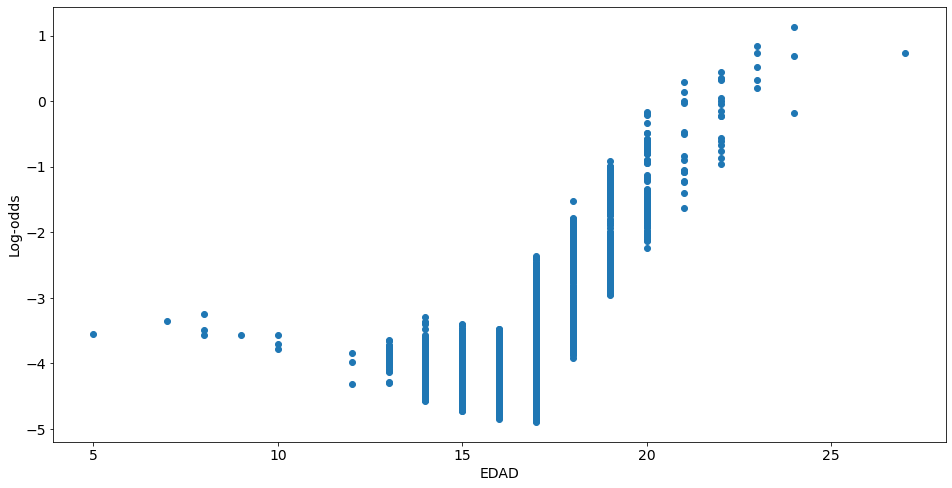

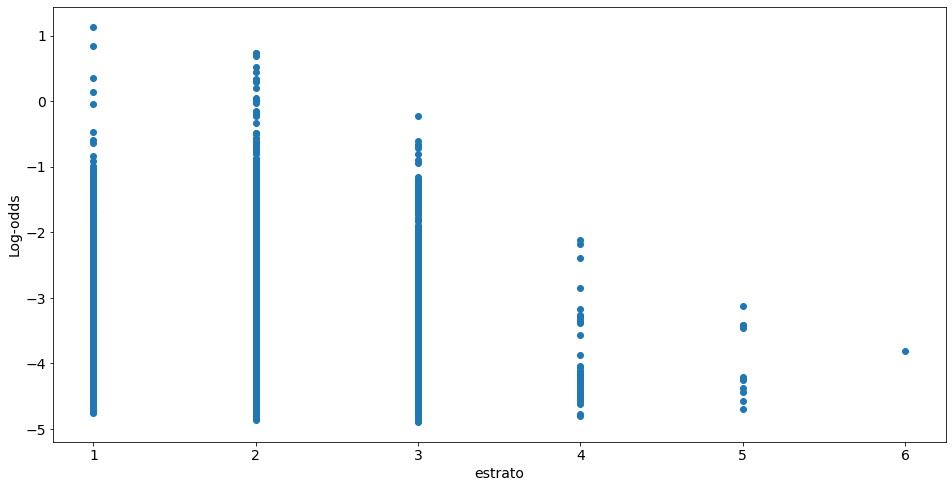

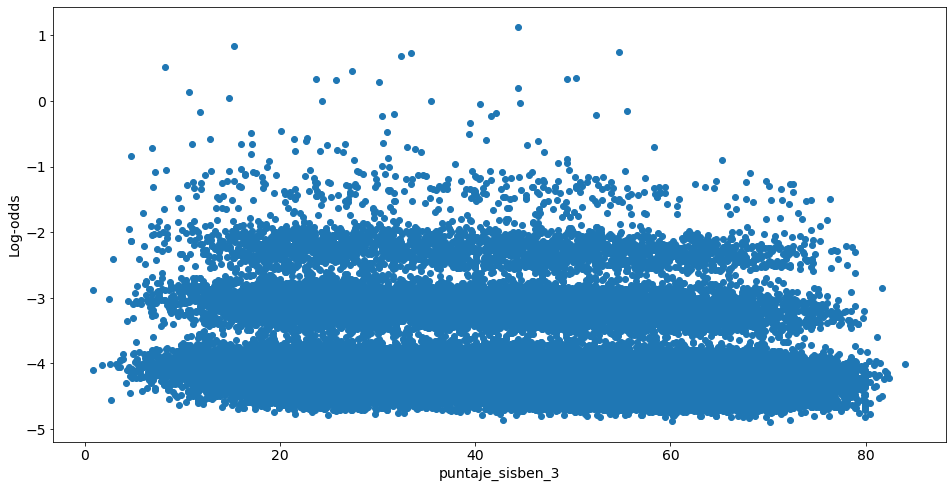

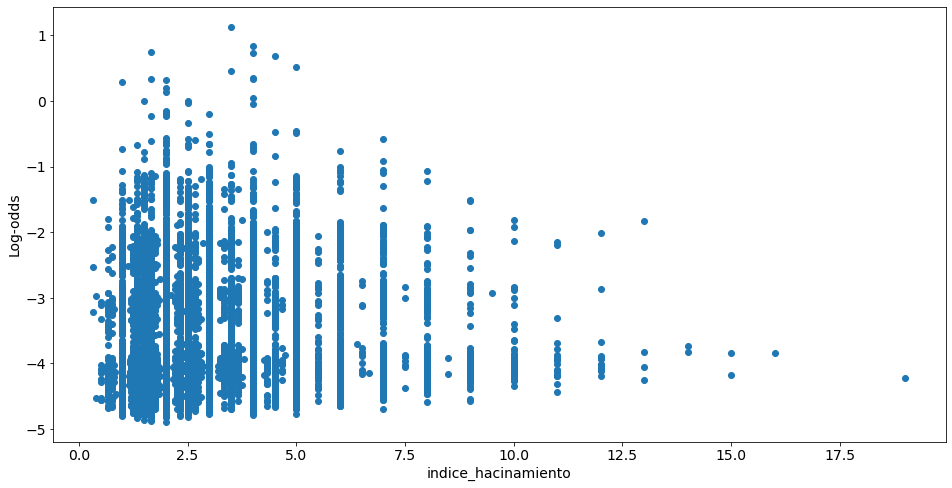

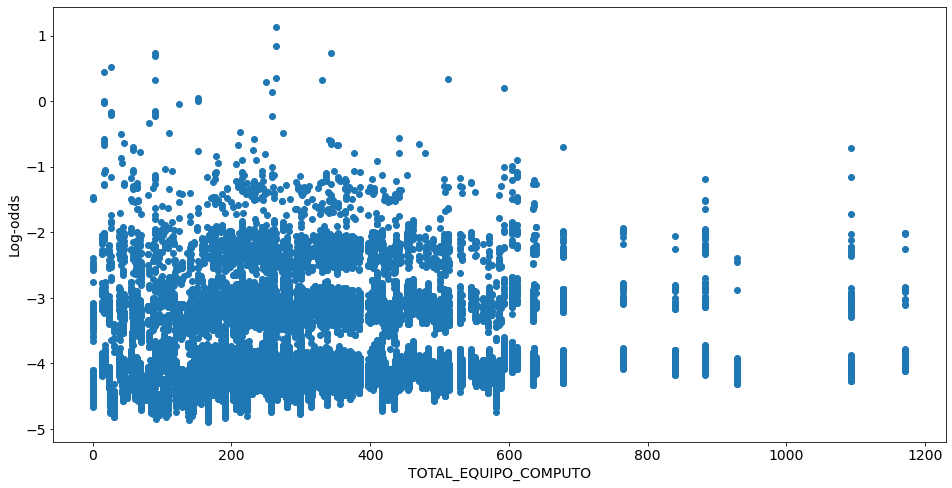

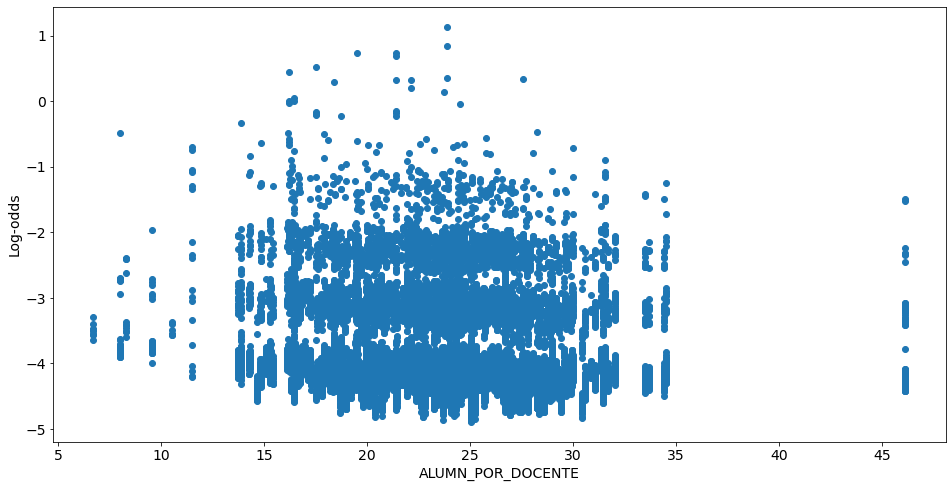

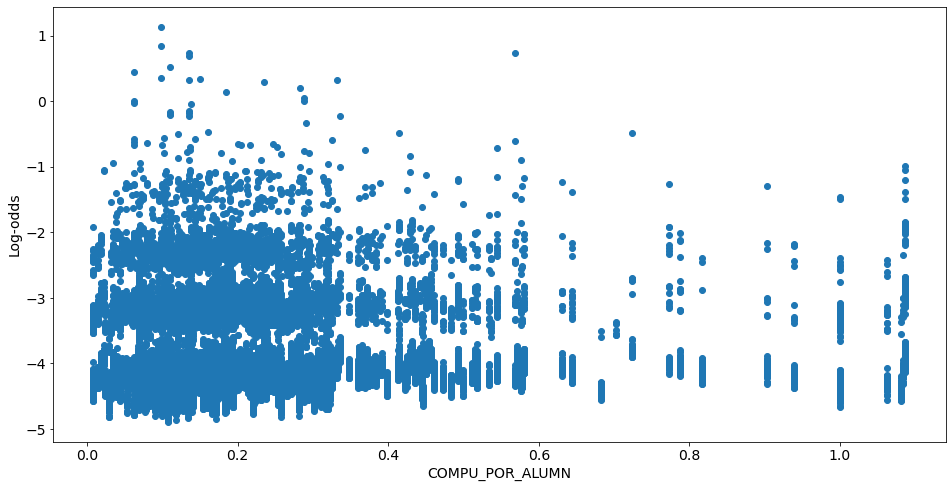

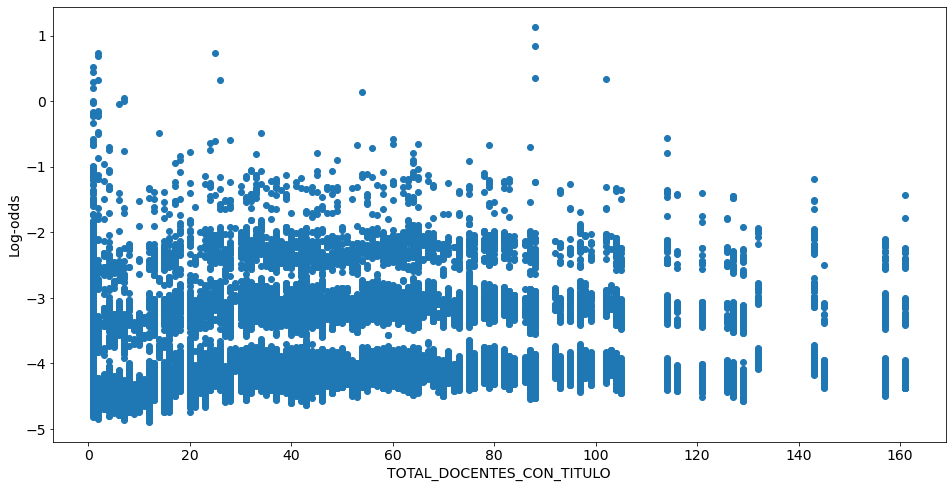

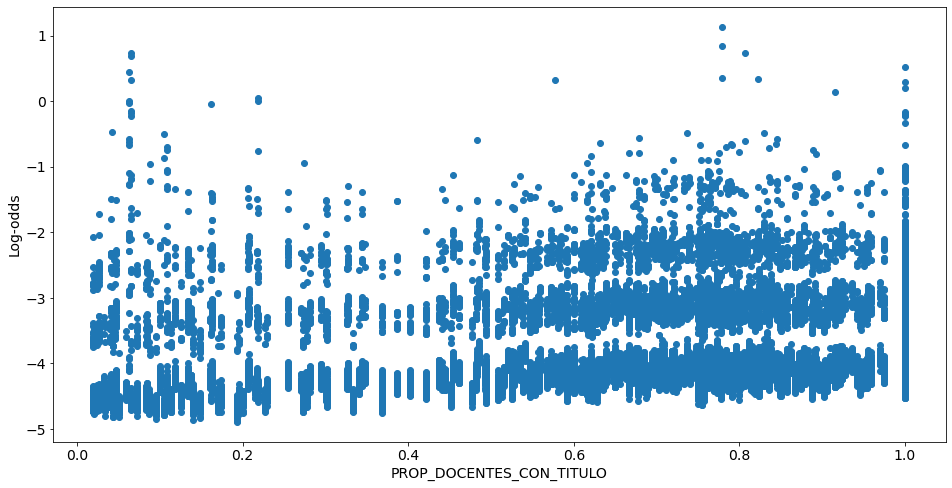

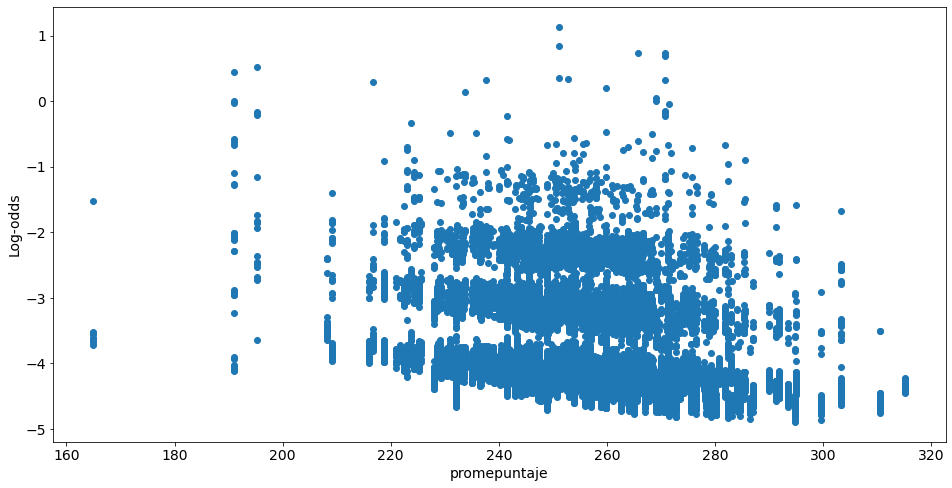

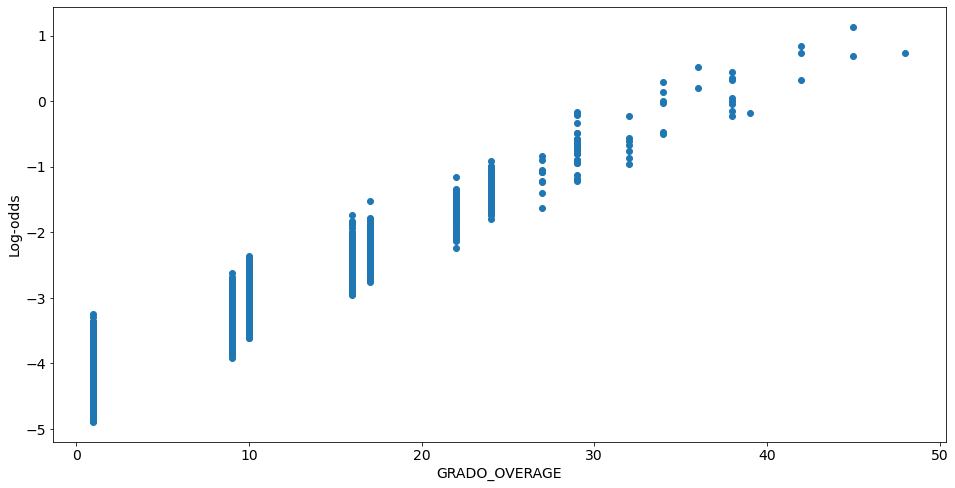

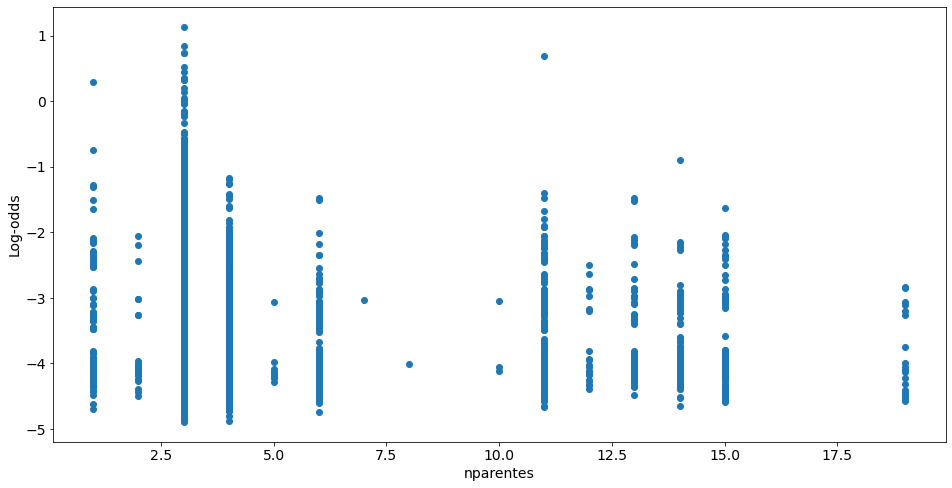

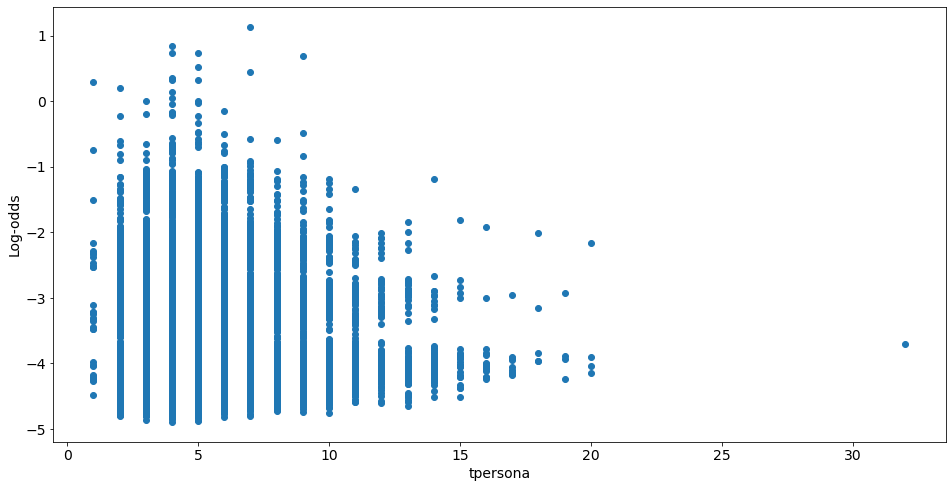

In [26]:
predicted = logit_results.predict(X_cons)

# Getting log odds values
log_odds = np.log(predicted / (1 - predicted))

# Visualize predictor variable vs logit values for Age
for var in variables:
    plt.scatter(x=X_cons[var].values, y=log_odds)
    plt.xlabel(f"{var}")
    plt.ylabel("Log-odds")
    plt.show()
    

#### Box Tidwell with the added variables

In [27]:
y = df['REPITENTE']
X = df[variables]

# 0 and 1 are interchangable since in either case value*ln(value) = 0
X.replace({0: 1, 0.0 : 1.0}, inplace = True)


for var in variables:
    X[f'{var}:Log_{var}'] = X[var].apply(lambda x: x * np.log(x))

C:\Users\diego\anaconda3\lib\site-packages\pandas\core\frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
<ipython-input-27-7718e828fc32>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[f'{var}:Log_{var}'] = X[var].apply(lambda x: x * np.log(x))


In [28]:
cols_to_keep = variables + X.columns.tolist()[-len(variables):]

In [29]:
X_cons = sm.add_constant(X, prepend=False)

In [30]:
## Should not print anything, otherwise an error will raise in the test
for col in X_cons:
    if np.isinf(X_cons[col]).values.sum() > 0:
        print(col)

In [31]:
## Should not print anything, otherwise an error will raise in the next cell
for col in X_cons:
    if np.isnan(X_cons[col]).values.sum() > 0:
        print(col, np.isnan(X_cons[col]).values.sum())

In [32]:
logit_results = sm.GLM(y, X_cons, family=sm.families.Binomial()).fit()
logit_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              REPITENTE   No. Observations:                65026
Model:                            GLM   Df Residuals:                    64999
Model Family:                Binomial   Df Model:                           26
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -6190.2
Date:                Thu, 07 Jul 2022   Deviance:                       12380.
Time:                        00:01:43   Pearson chi2:                 2.65e+07
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================
                                                              coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------
EDAD                                                       95.5331      4.916     19.433      0.000      85.898     105.168
estrato                                                    -0.3616      0.339     -1.065      0.287      -1.027       0.304
puntaje_sisben_3                                           -0.0034      0.035     -0.097      0.923      -0.071       0.065
indice_hacinamiento                                         0.0266      0.159      0.168      0.867      -0.284       0.337
TOTAL_EQUIPO_COMPUTO                                     3.444e-06      0.003      0.001      0.999      -0.006       0.006
ALUMN_POR_DOCENTE                                           0.6575      0.218      3.018      0.003       0.230       1.085
COMPU_POR_ALUMN                                             0.2593      0.266      0.976      0.329      -0.261       0.780
TOTAL_DOCENTES_CON_TITULO                                   0.0122      0.011      1.108      0.268      -0.009       0.034
PROP_DOCENTES_CON_TITULO                                    0.0611      0.214      0.285      0.775      -0.359       0.481
promepuntaje                                                0.5830      0.277      2.104      0.035       0.040       1.126
GRADO_OVERAGE                                              -0.2786      0.048     -5.786      0.000      -0.373      -0.184
nparentes                                                  -0.3783      0.312     -1.214      0.225      -0.989       0.232
tpersona                                                    0.1250      0.151      0.826      0.409      -0.172       0.422
EDAD:Log_EDAD                                             -25.2316      1.299    -19.422      0.000     -27.778     -22.685
estrato:Log_estrato                                         0.1680      0.207      0.811      0.417      -0.238       0.574
puntaje_sisben_3:Log_puntaje_sisben_3                       0.0008      0.007      0.108      0.914      -0.014       0.015
indice_hacinamiento:Log_indice_hacinamiento                -0.0140      0.068     -0.205      0.837      -0.148       0.120
TOTAL_EQUIPO_COMPUTO:Log_TOTAL_EQUIPO_COMPUTO           -5.756e-05      0.000     -0.123      0.902      -0.001       0.001
ALUMN_POR_DOCENTE:Log_ALUMN_POR_DOCENTE                    -0.1600      0.052     -3.068      0.002      -0.262      -0.058
COMPU_POR_ALUMN:Log_COMPU_POR_ALUMN                        -2.5060      0.589     -4.256      0.000      -3.660      -1.352
TOTAL_DOCENTES_CON_TITULO:Log_TOTAL_DOCENTES_CON_TITULO    -0.0021      0.002     -0.965      0.335      -0.006       0.002
PROP_DOCENTES_CON_TITULO:Log_PROP_DOCENTES_CON_TITULO       0.4768      0.425      1.123      0.261      -0

In [33]:
logit_results.pvalues[logit_results.pvalues > 0.05]

estrato                                                    0.286727
puntaje_sisben_3                                           0.922682
indice_hacinamiento                                        0.866934
TOTAL_EQUIPO_COMPUTO                                       0.999169
COMPU_POR_ALUMN                                            0.329132
TOTAL_DOCENTES_CON_TITULO                                  0.267999
PROP_DOCENTES_CON_TITULO                                   0.775463
nparentes                                                  0.224684
tpersona                                                   0.408875
estrato:Log_estrato                                        0.417211
puntaje_sisben_3:Log_puntaje_sisben_3                      0.913836
indice_hacinamiento:Log_indice_hacinamiento                0.837468
TOTAL_EQUIPO_COMPUTO:Log_TOTAL_EQUIPO_COMPUTO              0.902379
TOTAL_DOCENTES_CON_TITULO:Log_TOTAL_DOCENTES_CON_TITULO    0.334723
PROP_DOCENTES_CON_TITULO:Log_PROP_DOCENTES_CON_T

In [34]:
logit_results.pvalues[logit_results.pvalues > 0.05].index

Index(['estrato', 'puntaje_sisben_3', 'indice_hacinamiento',
       'TOTAL_EQUIPO_COMPUTO', 'COMPU_POR_ALUMN', 'TOTAL_DOCENTES_CON_TITULO',
       'PROP_DOCENTES_CON_TITULO', 'nparentes', 'tpersona',
       'estrato:Log_estrato', 'puntaje_sisben_3:Log_puntaje_sisben_3',
       'indice_hacinamiento:Log_indice_hacinamiento',
       'TOTAL_EQUIPO_COMPUTO:Log_TOTAL_EQUIPO_COMPUTO',
       'TOTAL_DOCENTES_CON_TITULO:Log_TOTAL_DOCENTES_CON_TITULO',
       'PROP_DOCENTES_CON_TITULO:Log_PROP_DOCENTES_CON_TITULO',
       'nparentes:Log_nparentes', 'tpersona:Log_tpersona'],
      dtype='object')

In [35]:
conti = []
for x in logit_results.pvalues[logit_results.pvalues > 0.05].index:
    if ":" in x:
        aux = x.split(':')
        conti.append(aux[0])
conti

['estrato',
 'puntaje_sisben_3',
 'indice_hacinamiento',
 'TOTAL_EQUIPO_COMPUTO',
 'TOTAL_DOCENTES_CON_TITULO',
 'PROP_DOCENTES_CON_TITULO',
 'nparentes',
 'tpersona']

In [36]:
# We will set our new variables as conti after running the sme test with another numeric algorithm (Newton)
len(variables)-len(conti)

5

-------------------------

#### Comparasion against smf.logit

We can see that the results are equivalent

In [37]:
def formula_odds(dependiente, variables):
    formula = f'{dependiente} ~ '
    for variable in variables:
        if formula != f'{dependiente} ~ ':
            formula += ' + '
        formula += f'{variable}'
        formula += f' + {variable} : np.log({variable})'
    return formula  

In [38]:
formula = formula_odds('REPITENTE', variables)
formula

'REPITENTE ~ EDAD + EDAD : np.log(EDAD) + estrato + estrato : np.log(estrato) + puntaje_sisben_3 + puntaje_sisben_3 : np.log(puntaje_sisben_3) + indice_hacinamiento + indice_hacinamiento : np.log(indice_hacinamiento) + TOTAL_EQUIPO_COMPUTO + TOTAL_EQUIPO_COMPUTO : np.log(TOTAL_EQUIPO_COMPUTO) + ALUMN_POR_DOCENTE + ALUMN_POR_DOCENTE : np.log(ALUMN_POR_DOCENTE) + COMPU_POR_ALUMN + COMPU_POR_ALUMN : np.log(COMPU_POR_ALUMN) + TOTAL_DOCENTES_CON_TITULO + TOTAL_DOCENTES_CON_TITULO : np.log(TOTAL_DOCENTES_CON_TITULO) + PROP_DOCENTES_CON_TITULO + PROP_DOCENTES_CON_TITULO : np.log(PROP_DOCENTES_CON_TITULO) + promepuntaje + promepuntaje : np.log(promepuntaje) + GRADO_OVERAGE + GRADO_OVERAGE : np.log(GRADO_OVERAGE) + nparentes + nparentes : np.log(nparentes) + tpersona + tpersona : np.log(tpersona)'

In [39]:
X_cons = X_cons.iloc[:,0:len(variables)]

In [40]:
X_cons['REPITENTE'] = y

In [41]:
model= smf.logit(formula=formula, data= X_cons).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.095195
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              REPITENTE   No. Observations:                65026
Model:                          Logit   Df Residuals:                    64999
Method:                           MLE   Df Model:                           26
Date:                Thu, 07 Jul 2022   Pseudo R-squ.:                  0.1239
Time:                        00:01:44   Log-Likelihood:                -6190.2
converged:                       True   LL-Null:                       -7065.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================================================================
                                                                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------
Intercept                                                    -437.0538     23.502    -18.596      0.000    -483.118    -390.990
EDAD                                                           95.5332      4.916     19.433      0.000      85.898     105.169
EDAD:np.log(EDAD)                                             -25.2316      1.299    -19.422      0.000     -27.778     -22.685
estrato                                                        -0.3616      0.339     -1.065      0.287      -1.027       0.304
estrato:np.log(estrato)                                         0.1680      0.207      0.811      0.417      -0.238       0.574
puntaje_sisben_3                                               -0.0034      0.035     -0.097      0.923      -0.071       0.065
puntaje_sisben_3:np.log(puntaje_sisben_3)                       0.0008      0.007      0.108      0.914      -0.014       0.015
indice_hacinamiento                                             0.0267      0.159      0.168      0.866      -0.284       0.338
indice_hacinamiento:np.log(indice_hacinamiento)                -0.0141      0.068     -0.206      0.837      -0.148       0.120
TOTAL_EQUIPO_COMPUTO                                         3.467e-06      0.003      0.001      0.999      -0.006       0.006
TOTAL_EQUIPO_COMPUTO:np.log(TOTAL_EQUIPO_COMPUTO)           -5.756e-05      0.000     -0.123      0.902      -0.001       0.001
ALUMN_POR_DOCENTE                                               0.6575      0.218      3.018      0.003       0.230       1.085
ALUMN_POR_DOCENTE:np.log(ALUMN_POR_DOCENTE)                    -0.1600      0.052     -3.068      0.002      -0.262      -0.058
COMPU_POR_ALUMN                                                 0.2593      0.266      0.976      0.329      -0.261       0.780
COMPU_POR_ALUMN:np.log(COMPU_POR_ALUMN)                        -2.5060      0.589     -4.256      0.000      -3.660      -1.352
TOTAL_DOCENTES_CON_TITULO                                       0.0122      0.011      1.108      0.268      -0.009       0.034
TOTAL_DOCENTES_CON_TITULO:np.log(TOTAL_DOCENTES_CON_TITULO)    -0.0021      0.002     -0.965      0.335      -0.006       0.002
PROP_DOCENTES_CON_TITULO                                        0.0611      0.214      0.285      0.775      -0.359       0.481
PROP_DOCENTES_CON_TITULO:np.log(PROP_DOCENTES_CON_TITULO)       0.4768      0.425      1.123      0.261      -0.355       1.309
promepuntaje                                                    0.5830      0.277      2.104      0.035       0.040       1.126
promepuntaje:np.log(promepuntaje)                              -0.0904      0.042     -2.130      0.033      -0.174      -0.007
GRADO_OVERAGE                                                  -0.2786      0.048     -5.786      0.000      -0.373      -0.184
GRADO_OVERAGE:np.log(GRADO_OVERAGE)      

In [42]:
model.pvalues[model.pvalues > 0.05]

estrato                                                        0.286725
estrato:np.log(estrato)                                        0.417208
puntaje_sisben_3                                               0.922619
puntaje_sisben_3:np.log(puntaje_sisben_3)                      0.913766
indice_hacinamiento                                            0.866455
indice_hacinamiento:np.log(indice_hacinamiento)                0.836990
TOTAL_EQUIPO_COMPUTO                                           0.999164
TOTAL_EQUIPO_COMPUTO:np.log(TOTAL_EQUIPO_COMPUTO)              0.902373
COMPU_POR_ALUMN                                                0.329130
TOTAL_DOCENTES_CON_TITULO                                      0.268001
TOTAL_DOCENTES_CON_TITULO:np.log(TOTAL_DOCENTES_CON_TITULO)    0.334725
PROP_DOCENTES_CON_TITULO                                       0.775461
PROP_DOCENTES_CON_TITULO:np.log(PROP_DOCENTES_CON_TITULO)      0.261463
nparentes                                                      0

In [43]:
conti2 = []
for x in model.pvalues[model.pvalues > 0.05].index:
    if ":" in x:
        aux = x.split(':')
        conti2.append(aux[0])
conti2

['estrato',
 'puntaje_sisben_3',
 'indice_hacinamiento',
 'TOTAL_EQUIPO_COMPUTO',
 'TOTAL_DOCENTES_CON_TITULO',
 'PROP_DOCENTES_CON_TITULO',
 'nparentes',
 'tpersona']

In [44]:
# Should print empty set
set(conti)-set(conti2)

set()

-------------------------

#### Select CONT 1

In [45]:
# As we can see, both test give us the same results, so we decided to set variables = conti
# Select the continuous variables that fulfill the second assumption for the model
variables = conti

-------------------------

### Number III: Outliers 
For the purpose of detecting outliers we will use two methods. Based on the same [Reference](https://towardsdatascience.com/assumptions-of-logistic-regression-clearly-explained-44d85a22b290) as in the assumptions, we consider the Cooks distance and the rule of thumb of three std.

In [46]:
# Performing a comparative analysis is possible to see that running outliers detection
#with or without categorical data produces the same results. 
all_variables = variables + categorias
y = df['REPITENTE']
X = df[variables]
X_cons = sm.add_constant(X, prepend=False)

In [47]:
logit_results = sm.GLM(y, X_cons, family=sm.families.Binomial()).fit()
logit_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              REPITENTE   No. Observations:                65026
Model:                            GLM   Df Residuals:                    65017
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7036.4
Date:                Thu, 07 Jul 2022   Deviance:                       14073.
Time:                        00:01:45   Pearson chi2:                 6.50e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
estrato                      -0.1154      0.042     -2.717      0.007      -0.199      -0.032
puntaje_sisben_3             -0.0061      0.002     -3.388      0.001      -0.010      -0.003
indice_hacinamiento          -0.0044      0.025     -0.180      0.857      -0.052       0.044
TOTAL_EQUIPO_COMPUTO          0.0003      0.000      1.755      0.079   -3.42e-05       0.001
TOTAL_DOCENTES_CON_TITULO    -0.0033      0.001     -3.431      0.001      -0.005      -0.001
PROP_DOCENTES_CON_TITULO      0.6868      0.123      5.606      0.000       0.447       0.927
nparentes                     0.0205      0.023      0.888      0.374      -0.025       0.066
tpersona                      0.0215      0.016      1.316      0.188      -0.011       0.054
const                        -3.7794      0.180    -20.951      0.000      -4.133      -3.426
=============================================================================================
"""

In [48]:
# Get influence measures
influence = logit_results.get_influence()

In [49]:
# Obtain summary df of influence measures
summ_df = influence.summary_frame()
# Filter summary df to Cook's distance values only
diagnosis_df = summ_df[['cooks_d']]

# Set Cook's distance threshold
cook_threshold = 4 / len(X)

In [50]:
# Append absolute standardized residual values 
diagnosis_df['std_resid'] = stats.zscore(logit_results.resid_pearson)
diagnosis_df['std_resid'] = diagnosis_df['std_resid'].apply(lambda x: np.abs(x))

<ipython-input-50-915f4f9d121e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diagnosis_df['std_resid'] = stats.zscore(logit_results.resid_pearson)
<ipython-input-50-915f4f9d121e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diagnosis_df['std_resid'] = diagnosis_df['std_resid'].apply(lambda x: np.abs(x))


In [51]:
# Find observations which are BOTH outlier (std dev > 3) and highly influential
extreme = diagnosis_df[(diagnosis_df['cooks_d'] > cook_threshold) & 
                       (diagnosis_df['std_resid'] > 3)]

In [52]:
# Show top 5 highly influential outlier observations
extreme.sort_values("cooks_d", ascending=False).head()

,cooks_d,std_resid
315074,0.014996,6.293942
285465,0.008613,6.412813
389023,0.008304,5.787172
432572,0.008128,5.263598
218194,0.008040,4.934188


In [53]:
extreme.index

Int64Index([    26,    128,    580,   1933,   2153,   2185,   2215,   2232,
              2233,   2241,
            ...
            449547, 449572, 450596, 450602, 450615, 450618, 450672, 450971,
            453368, 453793],
           dtype='int64', length=1481)

In [54]:
df.index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            456995, 457020, 457022, 457027, 457028, 457031, 457032, 457033,
            457039, 457041],
           dtype='int64', length=65026)

In [55]:
df['REPITENTE'][df.index.isin(extreme.index)].value_counts()

1    1481
Name: REPITENTE, dtype: int64

In [56]:
index_rep = df['REPITENTE'][df['REPITENTE'] == 1].index

In [57]:
extreme.index.difference(index_rep)

Int64Index([], dtype='int64')

In [58]:
# Delete undesirable outliers that are NOT Positive REPITENTE
df = df.loc[~df.index.isin(extreme.index.difference(index_rep))]

In [59]:
df.index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            456995, 457020, 457022, 457027, 457028, 457031, 457032, 457033,
            457039, 457041],
           dtype='int64', length=65026)

---------------


## Number IV: Absence of Multicolinearility

 ### Continuous variables
 From the graph below it is clear that no continuous variable presents multilinearity with each other

<ipython-input-60-5d64253ecffd>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df[variables].corr(), dtype=np.bool))


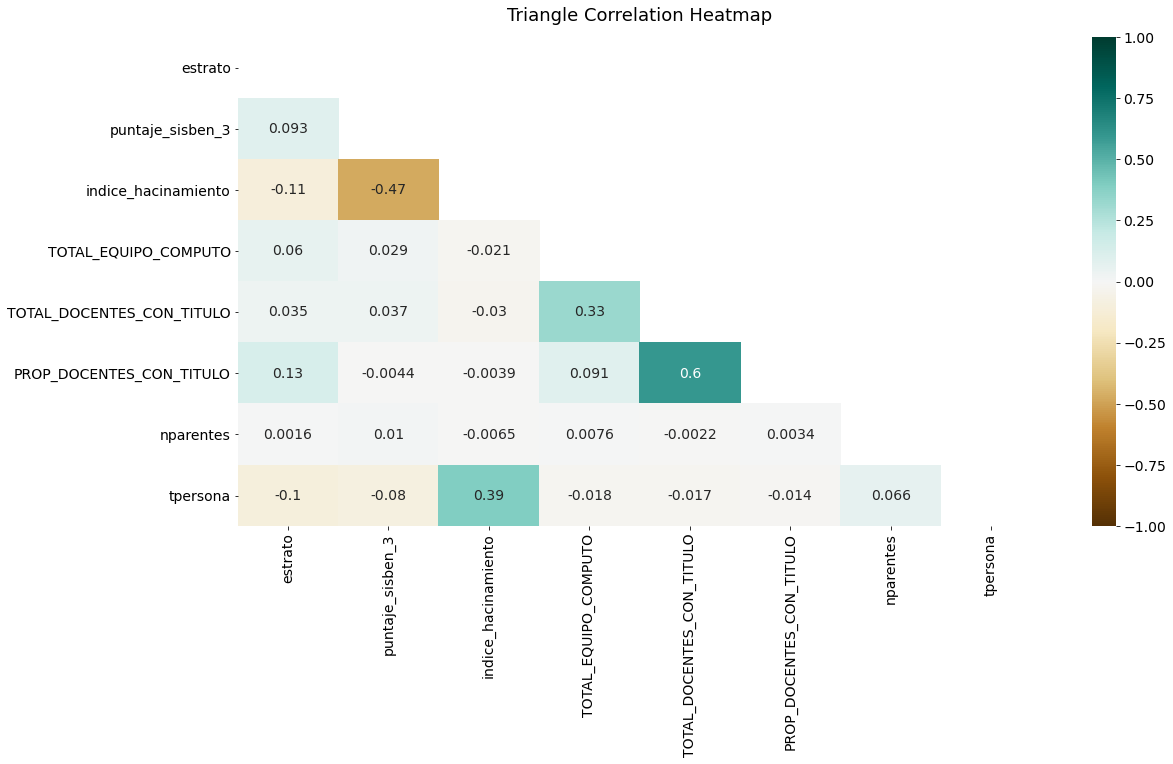

In [60]:
plt.figure(figsize=(18, 9))
# define the mask to set the values in the upper triangle to True

mask = np.triu(np.ones_like(df[variables].corr(), dtype=np.bool))
heatmap = sns.heatmap(df[variables].corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Use variance inflation factor to identify any significant multi-collinearity
def calc_vif(df):
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return(vif)

calc_vif(df[variables])

,variables,VIF
0,estrato,9.293418
1,puntaje_sisben_3,7.611373
2,indice_hacinamiento,6.641801
3,TOTAL_EQUIPO_COMPUTO,5.073893
4,TOTAL_DOCENTES_CON_TITULO,5.493250
5,PROP_DOCENTES_CON_TITULO,9.181660
6,nparentes,8.582032
7,tpersona,9.810986


In [62]:
aux_multico = []
multi_df = calc_vif(df[variables])
for i in range(len(multi_df)):
    name = multi_df['variables'][i]
    value= multi_df['VIF'][i]
    if value >= 10: # The statndard rule to discard a variable is: VIF >10
        aux_multico.append(name)
variables = list(set(variables) - set(aux_multico))

In [63]:
variables

['tpersona',
 'PROP_DOCENTES_CON_TITULO',
 'nparentes',
 'puntaje_sisben_3',
 'estrato',
 'indice_hacinamiento',
 'TOTAL_DOCENTES_CON_TITULO',
 'TOTAL_EQUIPO_COMPUTO']

## Number V: Independence of Observations for categorical Data (since continuous ones were treated already)
In this case the more appropiate thing to do is run a Chi-Squared test between all the categorical predictores and see which pairs are plausible.

In [64]:
def puntaje(x , categorias):
    pun= 0
    for i in categorias:
        crosstab = pd.crosstab(x, df[i])
        chi2, p, dof, ex = stats.chi2_contingency(crosstab)
        if p > 0.05:
            pun += 1
    return pun

In [65]:
independent = pd.DataFrame(columns = ['Category', 'counts'])
cats = categorias
counts = []
for j in categorias:
    counts.append(puntaje(df[j], categorias));
   
independent['Category'] = categorias
independent['counts'] = counts
independent = independent.sort_values(by = 'counts', ascending = False)
independent

,Category,counts
1,TIPO_DISCAPACIDAD,5
2,CODIGO_ETNIA,5
7,ES_BILINGUE,3
0,GENERO,2
5,computador,2
6,tiene_auto,2
4,teneviv,1
3,DIR_NUM_LOCALIDAD,0


In [66]:
independent['Below'] = independent['Category'].shift(-1)
independent

,Category,counts,Below
1,TIPO_DISCAPACIDAD,5,CODIGO_ETNIA
2,CODIGO_ETNIA,5,ES_BILINGUE
7,ES_BILINGUE,3,GENERO
0,GENERO,2,computador
5,computador,2,tiene_auto
6,tiene_auto,2,teneviv
4,teneviv,1,DIR_NUM_LOCALIDAD
3,DIR_NUM_LOCALIDAD,0,NaN


In [67]:
independent = independent.reset_index()

In [68]:
vals = []
for i in range(len(independent['Category'])-1):
    crosstab = pd.crosstab(df[independent['Category'][i]], df[independent['Below'][i]])
    chi2, p, dof, ex = stats.chi2_contingency(crosstab)
    vals.append(p)    

In [69]:
vals.append(1)

In [70]:
independent['p_values'] = vals

In [71]:
independent

,index,Category,counts,Below,p_values
0,1,TIPO_DISCAPACIDAD,5,CODIGO_ETNIA,0.708286
1,2,CODIGO_ETNIA,5,ES_BILINGUE,0.128982
2,7,ES_BILINGUE,3,GENERO,0.565638
3,0,GENERO,2,computador,0.000039
4,5,computador,2,tiene_auto,0.000000
5,6,tiene_auto,2,teneviv,0.000000
6,4,teneviv,1,DIR_NUM_LOCALIDAD,0.000000
7,3,DIR_NUM_LOCALIDAD,0,NaN,1.000000


In [72]:
cat_iid = []
for i in range(independent.shape[0]):
    cat_iid.append(independent['Category'][i])
    if independent['p_values'][i] <= 0.05:
        print(i)
        break

3


In [73]:
cat_iid

['TIPO_DISCAPACIDAD', 'CODIGO_ETNIA', 'ES_BILINGUE', 'GENERO']

#### These 3 lines are just a reminder of the variables taking into account

In [74]:
categorias = cat_iid

In [75]:
variables = conti

In [76]:
variables = list(set(variables) - set(aux_multico))

In [77]:
variables

['tpersona',
 'PROP_DOCENTES_CON_TITULO',
 'nparentes',
 'puntaje_sisben_3',
 'estrato',
 'indice_hacinamiento',
 'TOTAL_DOCENTES_CON_TITULO',
 'TOTAL_EQUIPO_COMPUTO']

In [78]:
categorias

['TIPO_DISCAPACIDAD', 'CODIGO_ETNIA', 'ES_BILINGUE', 'GENERO']

------------------

# Run Models

In [79]:
# def formula_maker(dependiente, variables, categorias):
#     formula = f'{dependiente} ~ '
#     for variable in variables:
#         if formula != f'{dependiente} ~ ':
#             formula += ' + '
#         formula += f'{variable}'
#     for categoria in categorias:
#         if formula != f'{dependiente} ~ ':
#             formula += ' + '
#         formula += f'C({categoria})'
#     return formula  

In [80]:
# formula

In [81]:
# formula=formula_maker('REPITENTE', variables, categorias)
# model= smf.logit(formula= formula, data= df).fit() # Add if method='bfgs' if singular Matrix appears
# model.summary()

In [82]:
# formula=formula_maker('REPITENTE', variables, categorias)
# model= smf.logit(formula= formula, data= df).fit(method = 'bfgs') # Add if method='bfgs' if singular Matrix appears
# model.summary()

## Model with selected variables

In [83]:
all_vars = variables + categorias
y1 = df['REPITENTE']
X1 = df[all_vars]

X_cons1 = sm.add_constant(X1, prepend=False)
X_cons1 = pd.get_dummies(X_cons1, columns=categorias, drop_first=True)
X_cons1.head(2)

,tpersona,PROP_DOCENTES_CON_TITULO,nparentes,puntaje_sisben_3,estrato,indice_hacinamiento,TOTAL_DOCENTES_CON_TITULO,TOTAL_EQUIPO_COMPUTO,const,TIPO_DISCAPACIDAD_1,CODIGO_ETNIA_1,CODIGO_ETNIA_2,CODIGO_ETNIA_3,CODIGO_ETNIA_4,CODIGO_ETNIA_5,CODIGO_ETNIA_6,ES_BILINGUE_1,GENERO_1
0,5,0.888889,3,29.440001,3,2.500000,24,231,1.0,0,0,0,0,0,0,0,0,0
1,4,0.888889,4,60.119999,2,1.333008,24,231,1.0,0,0,0,0,0,0,0,0,0


In [84]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_cons1, y1, test_size=0.3)

In [85]:
model_1 = sm.GLM(y_train1, X_train1, family=sm.families.Binomial()).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              REPITENTE   No. Observations:                45518
Model:                            GLM   Df Residuals:                    45501
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4930.1
Date:                Thu, 07 Jul 2022   Deviance:                       9860.2
Time:                        00:01:49   Pearson chi2:                 4.55e+04
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
tpersona                      0.0255      0.019      1.318      0.187      -0.012       0.063
PROP_DOCENTES_CON_TITULO      0.5788      0.144      4.027      0.000       0.297       0.860
nparentes                     0.0172      0.028      0.625      0.532      -0.037       0.071
puntaje_sisben_3             -0.0052      0.002     -2.427      0.015      -0.009      -0.001
estrato                      -0.0621      0.050     -1.235      0.217      -0.161       0.036
indice_hacinamiento           0.0129      0.029      0.445      0.656      -0.044       0.070
TOTAL_DOCENTES_CON_TITULO    -0.0028      0.001     -2.419      0.016      -0.005      -0.001
TOTAL_EQUIPO_COMPUTO          0.0004      0.000      1.892      0.058   -1.34e-05       0.001
const                        -4.2891      0.218    -19.679      0.000      -4.716      -3.862
TIPO_DISCAPACIDAD_1           0.2921      0.199      1.468      0.142      -0.098       0.682
CODIGO_ETNIA_1               -0.0138      0.508     -0.027      0.978      -1.010       0.982
CODIGO_ETNIA_2               -0.2371      0.585     -0.406      0.685      -1.383       0.909
CODIGO_ETNIA_3            -5.386e-12   5.21e-09     -0.001      0.999   -1.02e-08    1.02e-08
CODIGO_ETNIA_4              -19.7971   1.91e+04     -0.001      0.999   -3.75e+04    3.75e+04
CODIGO_ETNIA_5                0.1023      0.720      0.142      0.887      -1.308       1.513
CODIGO_ETNIA_6              -19.4560   5.62e+04     -0.000      1.000    -1.1e+05     1.1e+05
ES_BILINGUE_1                -0.9583      0.271     -3.532      0.000      -1.490      -0.426
GENERO_1                      0.6518      0.065     10.069      0.000       0.525       0.779
=============================================================================================
"""

### Threshold selection

[Reference](https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/)

In [86]:
y_probs1 = model_1.predict(X_test1)

fpr, tpr, thresholds = roc_curve(y_test1, y_probs1)
gmeans = np.sqrt(tpr * (1-fpr))

ix = np.argmax(gmeans)

print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
umbral = thresholds[ix]

Best Threshold=0.023411, G-Mean=0.586


In [87]:
def classi(x):
    if x > umbral:
        clase = 1
    else:
        clase = 0
    return clase

In [88]:
y_predict1 = y_probs1.apply(classi)

In [89]:
y_predict1.value_counts()

0    11100
1     8408
dtype: int64

In [90]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test1, y_predict1)
print(confusion_matrix)

[[10928  8153]
 [  172   255]]


<AxesSubplot:>

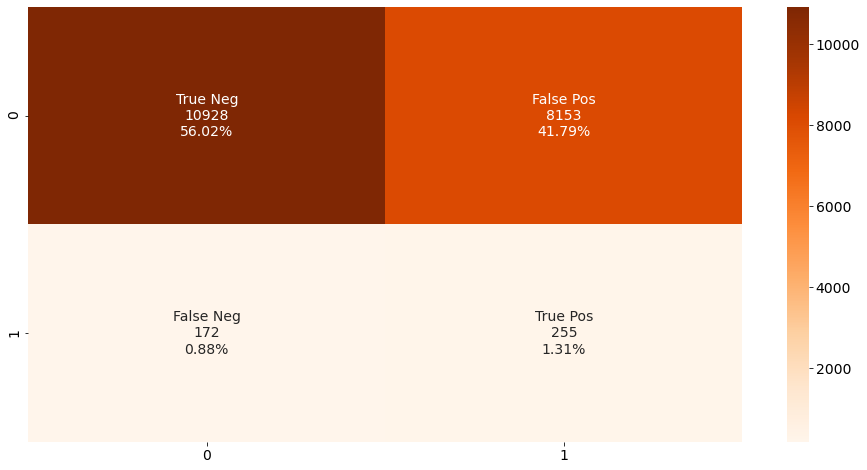

In [91]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                confusion_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     confusion_matrix.flatten()/np.sum(confusion_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix, annot=labels, fmt='', cmap='Oranges')

In [92]:
from sklearn.metrics import classification_report
print(classification_report(y_test1, y_predict1))

              precision    recall  f1-score   support

           0       0.98      0.57      0.72     19081
           1       0.03      0.60      0.06       427

    accuracy                           0.57     19508
   macro avg       0.51      0.58      0.39     19508
weighted avg       0.96      0.57      0.71     19508



## Model with weights

In [93]:
w = (df['REPITENTE'].value_counts()/ df.shape[0])[0]

In [94]:
def pesos(x):
    if x == 1:
        peso = w
    else:
        peso = 1-w
    return peso

In [95]:
all_vars = variables + categorias
y2 = df['REPITENTE']
X2 = df[all_vars]

X_cons2 = sm.add_constant(X2, prepend=False)
X_cons2 = pd.get_dummies(X_cons2, columns=categorias, drop_first=True)
X_cons2.head(2)

,tpersona,PROP_DOCENTES_CON_TITULO,nparentes,puntaje_sisben_3,estrato,indice_hacinamiento,TOTAL_DOCENTES_CON_TITULO,TOTAL_EQUIPO_COMPUTO,const,TIPO_DISCAPACIDAD_1,CODIGO_ETNIA_1,CODIGO_ETNIA_2,CODIGO_ETNIA_3,CODIGO_ETNIA_4,CODIGO_ETNIA_5,CODIGO_ETNIA_6,ES_BILINGUE_1,GENERO_1
0,5,0.888889,3,29.440001,3,2.500000,24,231,1.0,0,0,0,0,0,0,0,0,0
1,4,0.888889,4,60.119999,2,1.333008,24,231,1.0,0,0,0,0,0,0,0,0,0


In [96]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_cons2, y2, test_size=0.3)

In [97]:
pesos = y_train2.apply(pesos)

In [98]:
modelo_pesos = sm.GLM(y_train2, X_train2, family=sm.families.Binomial(), freq_weights=pesos).fit()
modelo_pesos.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              REPITENTE   No. Observations:                45518
Model:                            GLM   Df Residuals:                  1977.92
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1350.4
Date:                Thu, 07 Jul 2022   Deviance:                       2700.8
Time:                        00:01:51   Pearson chi2:                 2.00e+03
No. Iterations:                    18                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
tpersona                      0.0112      0.029      0.381      0.703      -0.046       0.069
PROP_DOCENTES_CON_TITULO      0.8526      0.214      3.988      0.000       0.434       1.272
nparentes                     0.0189      0.041      0.465      0.642      -0.061       0.099
puntaje_sisben_3             -0.0053      0.003     -1.694      0.090      -0.011       0.001
estrato                      -0.1708      0.074     -2.317      0.021      -0.315      -0.026
indice_hacinamiento           0.0065      0.043      0.150      0.881      -0.078       0.091
TOTAL_DOCENTES_CON_TITULO    -0.0041      0.002     -2.378      0.017      -0.007      -0.001
TOTAL_EQUIPO_COMPUTO          0.0004      0.000      1.142      0.254      -0.000       0.001
const                        -0.3225      0.318     -1.014      0.311      -0.946       0.301
TIPO_DISCAPACIDAD_1           0.4396      0.307      1.434      0.152      -0.161       1.041
CODIGO_ETNIA_1               -0.7159      0.916     -0.782      0.434      -2.511       1.079
CODIGO_ETNIA_2               -0.1103      0.728     -0.152      0.880      -1.537       1.316
CODIGO_ETNIA_3              -19.7661   7.13e+04     -0.000      1.000    -1.4e+05     1.4e+05
CODIGO_ETNIA_4              -19.4825   1.71e+04     -0.001      0.999   -3.35e+04    3.35e+04
CODIGO_ETNIA_5               -0.6343      1.296     -0.489      0.625      -3.175       1.906
CODIGO_ETNIA_6              -19.1421   5.03e+04     -0.000      1.000   -9.86e+04    9.86e+04
ES_BILINGUE_1                -0.4332      0.286     -1.514      0.130      -0.994       0.127
GENERO_1                      0.5304      0.091      5.796      0.000       0.351       0.710
=============================================================================================
"""

In [99]:
y_probs2 = modelo_pesos.predict(X_test2)

fpr, tpr, thresholds = roc_curve(y_test2, y_probs2)
gmeans = np.sqrt(tpr * (1-fpr))

ix = np.argmax(gmeans)

print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
umbral = thresholds[ix]


Best Threshold=0.500850, G-Mean=0.597


In [100]:
def classi(x):
    if x > umbral:
        clase = 1
    else:
        clase = 0
    return clase

In [101]:
y_predict2 = y_probs2.apply(classi)

In [102]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test2, y_predict2)
print(confusion_matrix)

[[11423  7609]
 [  194   282]]


<AxesSubplot:>

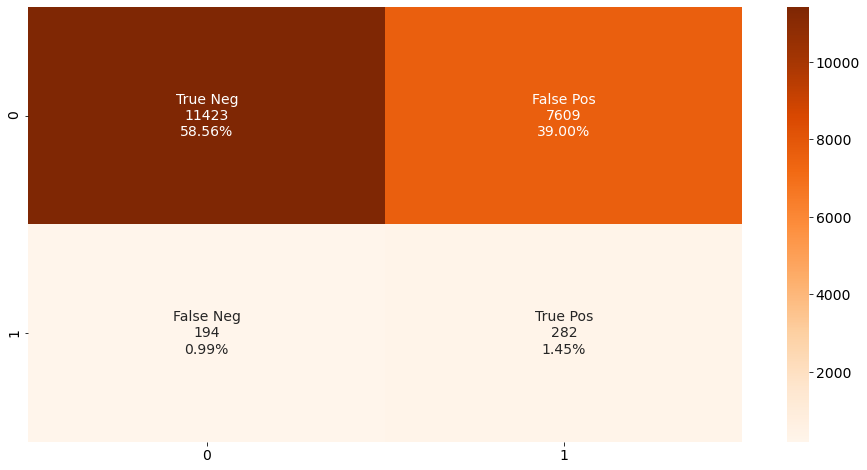

In [103]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                confusion_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     confusion_matrix.flatten()/np.sum(confusion_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix, annot=labels, fmt='', cmap='Oranges')

In [104]:
from sklearn.metrics import classification_report
print(classification_report(y_test2, y_predict2))

              precision    recall  f1-score   support

           0       0.98      0.60      0.75     19032
           1       0.04      0.59      0.07       476

    accuracy                           0.60     19508
   macro avg       0.51      0.60      0.41     19508
weighted avg       0.96      0.60      0.73     19508



## Model with balanced dataset

In [105]:
df_repitentes = df[df['REPITENTE'] == 1]
df_no_repitentes = df[df['REPITENTE'] == 0].sample(n=df_repitentes.shape[0], random_state=145)
df_consolidado_frac = pd.concat([df_no_repitentes, df_repitentes])

In [106]:
all_vars = variables + categorias
y = df_consolidado_frac['REPITENTE']
X = df_consolidado_frac[all_vars]

X_cons = sm.add_constant(X, prepend=False)
X_cons = pd.get_dummies(X_cons, columns=categorias, drop_first=True)
X_cons.head(2)

,tpersona,PROP_DOCENTES_CON_TITULO,nparentes,puntaje_sisben_3,estrato,indice_hacinamiento,TOTAL_DOCENTES_CON_TITULO,TOTAL_EQUIPO_COMPUTO,const,TIPO_DISCAPACIDAD_1,CODIGO_ETNIA_1,CODIGO_ETNIA_2,CODIGO_ETNIA_5,CODIGO_ETNIA_6,ES_BILINGUE_1,GENERO_1
415252,4,0.823529,3,32.57,1,2.0,42,283,1.0,0,0,1,0,0,0,0
49382,4,0.401961,3,29.75,2,2.0,41,67,1.0,0,0,0,0,0,0,1


In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_cons, y, test_size=0.3)

In [108]:
y_train.value_counts()

1    1055
0    1018
Name: REPITENTE, dtype: int64

In [109]:
modelo_balanceado = sm.GLM(y_train, X_train, family=sm.families.Binomial()).fit()
modelo_balanceado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              REPITENTE   No. Observations:                 2073
Model:                            GLM   Df Residuals:                     2058
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1393.8
Date:                Thu, 07 Jul 2022   Deviance:                       2787.6
Time:                        00:01:52   Pearson chi2:                 2.07e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
tpersona                      0.0277      0.030      0.920      0.357      -0.031       0.087
PROP_DOCENTES_CON_TITULO      0.9210      0.209      4.403      0.000       0.511       1.331
nparentes                     0.0118      0.040      0.298      0.766      -0.066       0.090
puntaje_sisben_3             -0.0047      0.003     -1.507      0.132      -0.011       0.001
estrato                      -0.1113      0.073     -1.528      0.126      -0.254       0.031
indice_hacinamiento           0.0017      0.043      0.040      0.968      -0.084       0.087
TOTAL_DOCENTES_CON_TITULO    -0.0027      0.002     -1.594      0.111      -0.006       0.001
TOTAL_EQUIPO_COMPUTO          0.0003      0.000      0.914      0.361      -0.000       0.001
const                        -0.5856      0.320     -1.833      0.067      -1.212       0.041
TIPO_DISCAPACIDAD_1           0.5283      0.302      1.749      0.080      -0.064       1.120
CODIGO_ETNIA_1               -0.1081      0.693     -0.156      0.876      -1.467       1.251
CODIGO_ETNIA_2                0.1431      0.790      0.181      0.856      -1.405       1.692
CODIGO_ETNIA_5               20.1777   1.25e+04      0.002      0.999   -2.46e+04    2.46e+04
CODIGO_ETNIA_6             -1.38e-11   8.57e-09     -0.002      0.999   -1.68e-08    1.68e-08
ES_BILINGUE_1                -0.6407      0.274     -2.343      0.019      -1.177      -0.105
GENERO_1                      0.6168      0.090      6.826      0.000       0.440       0.794
=============================================================================================
"""

In [110]:
y_probs = modelo_balanceado.predict(X_test)

# Calculates different FPR and TPR
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
# Take geometric mean as criteria for determining Threeshold
gmeans = np.sqrt(tpr * (1-fpr))

# Get maximun value
ix = np.argmax(gmeans)


print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

# Set the threshold
umbral = thresholds[ix]

Best Threshold=0.518794, G-Mean=0.588


In [111]:
def classi(x):
    if x > umbral:
        clase = 1
    else:
        clase = 0
    return clase

In [112]:
y_predict = y_probs.apply(classi)

In [113]:
# Interesting graphs to explore
# sns.scatterplot(X_test['indice_hacinamiento'], y_probs)

In [114]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_predict)
print(confusion_matrix)

[[278 185]
 [182 244]]


<AxesSubplot:>

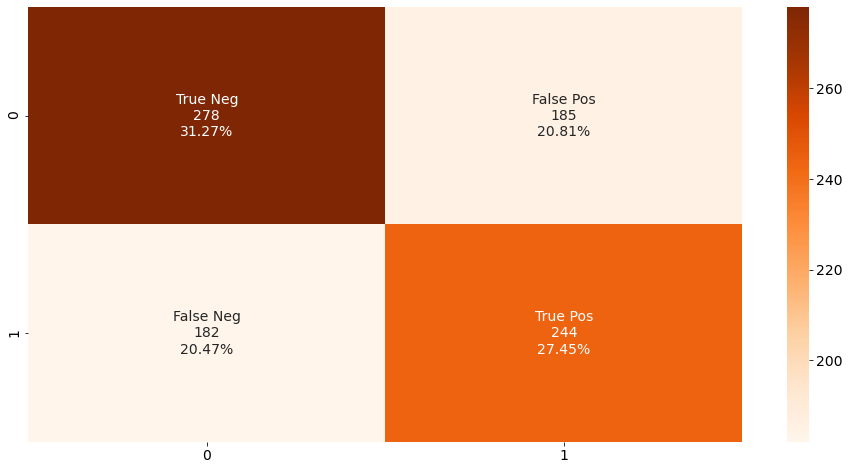

In [115]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                confusion_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     confusion_matrix.flatten()/np.sum(confusion_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix, annot=labels, fmt='', cmap='Oranges')

In [116]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.60      0.60      0.60       463
           1       0.57      0.57      0.57       426

    accuracy                           0.59       889
   macro avg       0.59      0.59      0.59       889
weighted avg       0.59      0.59      0.59       889



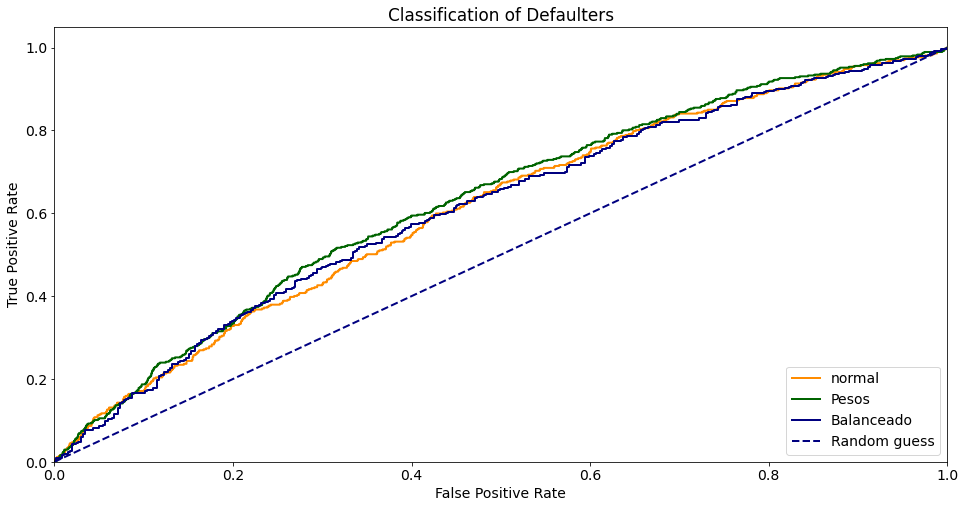

In [117]:
predict_p = model_1.predict(X_test1)
predict_2_p = modelo_pesos.predict(X_test2)
predict_3_p = modelo_balanceado.predict(X_test)

roc_p = roc_curve(y_test1, predict_p)
roc_2_p = roc_curve(y_test2, predict_2_p)
roc_3_p = roc_curve(y_test, predict_3_p)

plt.figure()
line_width = 2
plt.plot(roc_p[0], roc_p[1], color='darkorange',
         lw=line_width, label=f'normal')
plt.plot(roc_2_p[0], roc_2_p[1], color='darkgreen',
         lw=line_width, label=f'Pesos')
plt.plot(roc_3_p[0], roc_3_p[1], color='navy',
         lw=line_width, label=f'Balanceado')

plt.plot([0, 1], [0, 1], color='navy', lw=line_width, linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Classification of Defaulters')
plt.legend(loc='lower right')
plt.show()

In [118]:

auc_p = auc( roc_p[0], roc_p[1] )
auc_2_p = auc( roc_2_p[0], roc_2_p[1] )
auc_3_p = auc(roc_3_p[0], roc_3_p[1])

print('AUC of Normal: ', auc_p)
print('AUC of the model pesos ', auc_2_p)
print('AUC of the model balanceado ', auc_3_p)

AUC of Normal:  0.6099854472250495
AUC of the model pesos  0.6287399969445533
AUC of the model balanceado  0.6110942110546649


## Model selection based on AUC scores

**Select the model with biggest AUC score**



In [119]:
AUC_scores =[auc_p, auc_2_p, auc_3_p]

In [120]:
indice_max_models = np.argmax(AUC_scores)

In [121]:
if indice_max_models == 0:
    print('Best model is Regresion Logistica Simple')
elif indice_max_models == 1:
    print('Best model is Regresion Logistica con Pesos')
else:
    print('Best model is Regresion Logistica Balanceada')

Best model is Regresion Logistica con Pesos


**Below we can see the variables that were take into account when running the previous models**

In [122]:
variables

['tpersona',
 'PROP_DOCENTES_CON_TITULO',
 'nparentes',
 'puntaje_sisben_3',
 'estrato',
 'indice_hacinamiento',
 'TOTAL_DOCENTES_CON_TITULO',
 'TOTAL_EQUIPO_COMPUTO']

In [123]:
categorias

['TIPO_DISCAPACIDAD', 'CODIGO_ETNIA', 'ES_BILINGUE', 'GENERO']

-------------------------------------

# Dash tables

In [124]:
indice_max_models

1

In [125]:
def aux_is_m(n):
    if n-1 == indice_max_models:
        val = 'Si'
    else:
        val = 'No'
    return val

In [133]:
tab1 =  model_1.params.to_frame().reset_index()
tab2 = modelo_pesos.params.to_frame().reset_index()
tab3 = modelo_balanceado.params.to_frame().reset_index()

tab = pd.concat([tab1,tab2,tab3], axis = 0)
tab = tab.reset_index()
tab.drop('level_0', inplace = True, axis = 1)
tab.rename(columns = {'index': 'variable'}, inplace = True)
tab.rename(columns = {0: 'coeff'}, inplace = True)

p1 = model_1.pvalues.to_frame().reset_index()
p2 = modelo_pesos.pvalues.to_frame().reset_index()
p3 = modelo_balanceado.pvalues.to_frame().reset_index()

pvals = pd.concat([p1,p2,p3], axis = 0)
pvals = pvals.reset_index()

pvals.drop('level_0', inplace = True, axis = 1)
pvals.drop('index', inplace = True, axis = 1)
pvals.rename(columns = {0: 'significative'}, inplace = True)
tab = pd.concat([tab,pvals], axis = 1)


tab['Anno'] = 2020
tab['nivel'] = 'Media'

m1 = ['Regresion Logistica Simple']*tab1.shape[0]
m1 = pd.Series(m1)

m2 = ['Regresión Logistica con Pesos']*tab2.shape[0]
m2 =  pd.Series(m2 , index = [i for i in range(tab1.shape[0] , tab1.shape[0]+tab2.shape[0] )])

m3 = ['Regresión Logistica Balanceada']*tab3.shape[0]
m3 = pd.Series(m3 , index = [i for i in range(tab1.shape[0] + tab2.shape[0], tab1.shape[0]+tab2.shape[0] + tab3.shape[0])])

m = pd.concat([m1,m2,m3], axis = 0)

tab['model'] = m

is_m1 =[aux_is_m(1)]*tab1.shape[0]
is_m1 = pd.Series(is_m1)

is_m2 = [aux_is_m(2)]*tab2.shape[0]
is_m2 =  pd.Series(is_m2 , index = [i for i in range(tab1.shape[0] , tab1.shape[0]+tab2.shape[0] )])

is_m3 = [aux_is_m(3)]*tab3.shape[0]
is_m3 = pd.Series(is_m3 , index = [i for i in range(tab1.shape[0] + tab2.shape[0], tab1.shape[0]+tab2.shape[0] + tab3.shape[0])])

is_m = pd.concat([is_m1,is_m2,is_m3], axis = 0)
tab['is_final_model'] = is_m
tab


,variable,coeff,significative,Anno,nivel,model,is_final_model
0,tpersona,2.553021e-02,1.874523e-01,2020,Media,Regresion Logistica Simple,No
1,PROP_DOCENTES_CON_TITULO,5.787571e-01,5.658621e-05,2020,Media,Regresion Logistica Simple,No
2,nparentes,1.720428e-02,5.318974e-01,2020,Media,Regresion Logistica Simple,No
3,puntaje_sisben_3,-5.227532e-03,1.522234e-02,2020,Media,Regresion Logistica Simple,No
4,estrato,-6.208439e-02,2.168064e-01,2020,Media,Regresion Logistica Simple,No
5,indice_hacinamiento,1.290993e-02,6.562035e-01,2020,Media,Regresion Logistica Simple,No
6,TOTAL_DOCENTES_CON_TITULO,-2.809409e-03,1.557109e-02,2020,Media,Regresion Logistica Simple,No
7,TOTAL_EQUIPO_COMPUTO,3.743793e-04,5.847832e-02,2020,Media,Regresion Logistica Simple,No
8,const,-4.289099e+00,3.262368e-86,2020,Media,Regresion Logistica Simple,No
9,TIPO_DISCAPACIDAD_1,2.921045e-01,1.422295e-01,2020,Media,Regresion Logistica Simple,No


In [134]:
def aux_sig(x):
    if x < 0.05:
        val = 'Si'
    else:
        val = 'No'
    return val

In [135]:
tab['significative'] = tab['significative'].apply(aux_sig )

In [137]:
tab

,variable,coeff,significative,Anno,nivel,model,is_final_model
0,tpersona,2.553021e-02,No,2020,Media,Regresion Logistica Simple,No
1,PROP_DOCENTES_CON_TITULO,5.787571e-01,Si,2020,Media,Regresion Logistica Simple,No
2,nparentes,1.720428e-02,No,2020,Media,Regresion Logistica Simple,No
3,puntaje_sisben_3,-5.227532e-03,Si,2020,Media,Regresion Logistica Simple,No
4,estrato,-6.208439e-02,No,2020,Media,Regresion Logistica Simple,No
5,indice_hacinamiento,1.290993e-02,No,2020,Media,Regresion Logistica Simple,No
6,TOTAL_DOCENTES_CON_TITULO,-2.809409e-03,Si,2020,Media,Regresion Logistica Simple,No
7,TOTAL_EQUIPO_COMPUTO,3.743793e-04,No,2020,Media,Regresion Logistica Simple,No
8,const,-4.289099e+00,Si,2020,Media,Regresion Logistica Simple,No
9,TIPO_DISCAPACIDAD_1,2.921045e-01,No,2020,Media,Regresion Logistica Simple,No


In [138]:
tab.to_csv('../data/3-oro/t20m.csv')

In [130]:
# Modelo con pesos
modelo_pesos.params.to_frame().reset_index()

,index,0
0,tpersona,0.011232
1,PROP_DOCENTES_CON_TITULO,0.852570
2,nparentes,0.018881
3,puntaje_sisben_3,-0.005314
4,estrato,-0.170788
5,indice_hacinamiento,0.006479
6,TOTAL_DOCENTES_CON_TITULO,-0.004097
7,TOTAL_EQUIPO_COMPUTO,0.000355
8,const,-0.322484
9,TIPO_DISCAPACIDAD_1,0.439618


In [131]:
# Modelo Balanceado
modelo_balanceado.params.to_frame().reset_index()

,index,0
0,tpersona,2.771293e-02
1,PROP_DOCENTES_CON_TITULO,9.210410e-01
2,nparentes,1.184070e-02
3,puntaje_sisben_3,-4.718287e-03
4,estrato,-1.113019e-01
5,indice_hacinamiento,1.727430e-03
6,TOTAL_DOCENTES_CON_TITULO,-2.715798e-03
7,TOTAL_EQUIPO_COMPUTO,2.906841e-04
8,const,-5.856166e-01
9,TIPO_DISCAPACIDAD_1,5.283292e-01


In [132]:
dict_fallo = {'f':0 'f'}

SyntaxError: invalid syntax (<ipython-input-132-c62b09edfb16>, line 1)

-----------------------------

# Models with all variables

### Model with all variables + Constant

In [139]:
variables = ['EDAD',
             'estrato',
             'puntaje_sisben_3',
             'indice_hacinamiento', #-> solo si no se pone nivel_hacinamiento en Categoria
             'TOTAL_EQUIPO_COMPUTO',
             'ALUMN_POR_DOCENTE',
             'COMPU_POR_ALUMN',
             'TOTAL_DOCENTES_CON_TITULO',
             'PROP_DOCENTES_CON_TITULO', #-> solo si no se incluye TOTAL_DOCENTES_CON_TITULO y TOTAL_ALUM al tiempo
             'promepuntaje',
             'GRADO_OVERAGE',
             #'TOTAL_DOCENTES',
             #'TOTAL_ALUMNOS',
             'nparentes',
             #'tcuartosvi',
             'tpersona'
            ]

categorias= ['GENERO',
             'POB_VICT_CONF',
             'PROVIENE_OTR_MUN',
             'TIPO_DISCAPACIDAD',
             'CODIGO_ETNIA',
             'CODIGO_JORNADA',
             'DIR_NUM_LOCALIDAD',
             'embaraza',
             'todos_servicios_Pub',
             'teneviv',
             'computador',
             'tiene_auto',
             'ES_BILINGUE',
             'CAP_EXC',
             

             ]

In [140]:
all_vars = variables + categorias
y = df['REPITENTE']
X = df[all_vars]

X_cons = sm.add_constant(X, prepend=False)
X_cons = pd.get_dummies(X_cons, columns=categorias, drop_first=True)
X_cons.head(2)

,EDAD,estrato,puntaje_sisben_3,indice_hacinamiento,TOTAL_EQUIPO_COMPUTO,ALUMN_POR_DOCENTE,COMPU_POR_ALUMN,TOTAL_DOCENTES_CON_TITULO,PROP_DOCENTES_CON_TITULO,promepuntaje,GRADO_OVERAGE,nparentes,tpersona,const,GENERO_1,POB_VICT_CONF_1,PROVIENE_OTR_MUN_1,TIPO_DISCAPACIDAD_1,CODIGO_ETNIA_1,CODIGO_ETNIA_2,CODIGO_ETNIA_3,CODIGO_ETNIA_4,CODIGO_ETNIA_5,CODIGO_ETNIA_6,CODIGO_JORNADA_2,CODIGO_JORNADA_3,CODIGO_JORNADA_6,DIR_NUM_LOCALIDAD_2,DIR_NUM_LOCALIDAD_3,DIR_NUM_LOCALIDAD_4,DIR_NUM_LOCALIDAD_5,DIR_NUM_LOCALIDAD_6,DIR_NUM_LOCALIDAD_7,DIR_NUM_LOCALIDAD_8,DIR_NUM_LOCALIDAD_9,DIR_NUM_LOCALIDAD_10,DIR_NUM_LOCALIDAD_11,DIR_NUM_LOCALIDAD_12,DIR_NUM_LOCALIDAD_13,DIR_NUM_LOCALIDAD_14,DIR_NUM_LOCALIDAD_15,DIR_NUM_LOCALIDAD_16,DIR_NUM_LOCALIDAD_17,DIR_NUM_LOCALIDAD_18,DIR_NUM_LOCALIDAD_19,DIR_NUM_LOCALIDAD_20,embaraza_1,todos_servicios_Pub_1,teneviv_2,teneviv_3,teneviv_4,computador_1,tiene_auto_1,ES_BILINGUE_1,CAP_EXC_2,CAP_EXC_3,CAP_EXC_4,CAP_EXC_5,CAP_EXC_6,CAP_EXC_7,CAP_EXC_9,CAP_EXC_10,CAP_EXC_11
0,16,3,29.440001,2.500000,231,23.222222,0.368421,24,0.888889,262.909091,0,3,5,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,16,2,60.119999,1.333008,231,23.222222,0.368421,24,0.888889,262.909091,0,4,4,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [141]:
from sklearn.model_selection import train_test_split
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_cons, y, test_size=0.3)

In [142]:
model_all = sm.GLM(y_train_all, X_train_all, family=sm.families.Binomial()).fit()
model_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              REPITENTE   No. Observations:                45518
Model:                            GLM   Df Residuals:                    45457
Model Family:                Binomial   Df Model:                           60
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4530.3
Date:                Thu, 07 Jul 2022   Deviance:                       9060.6
Time:                        15:33:37   Pearson chi2:                 4.46e+04
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
EDAD                         -0.1032      0.047     -2.207      0.027      -0.195      -0.012
estrato                       0.0129      0.061      0.211      0.833      -0.107       0.133
puntaje_sisben_3             -0.0007      0.002     -0.284      0.777      -0.005       0.004
indice_hacinamiento           0.0023      0.030      0.078      0.938      -0.057       0.062
TOTAL_EQUIPO_COMPUTO          0.0011      0.000      3.588      0.000       0.000       0.002
ALUMN_POR_DOCENTE            -0.0264      0.010     -2.565      0.010      -0.047      -0.006
COMPU_POR_ALUMN              -0.8276      0.397     -2.083      0.037      -1.606      -0.049
TOTAL_DOCENTES_CON_TITULO    -0.0053      0.002     -3.013      0.003      -0.009      -0.002
PROP_DOCENTES_CON_TITULO      0.9544      0.178      5.375      0.000       0.606       1.302
promepuntaje                 -0.0033      0.003     -1.206      0.228      -0.009       0.002
GRADO_OVERAGE                 0.1328      0.009     15.014      0.000       0.115       0.150
nparentes                    -0.0026      0.028     -0.093      0.926      -0.058       0.053
tpersona                      0.0118      0.020      0.576      0.565      -0.028       0.052
const                       -21.9519   2.78e+04     -0.001      0.999   -5.45e+04    5.44e+04
GENERO_1                      0.5622      0.067      8.395      0.000       0.431       0.693
POB_VICT_CONF_1              -0.2387      0.202     -1.180      0.238      -0.635       0.158
PROVIENE_OTR_MUN_1            0.1355      0.307      0.441      0.659      -0.467       0.738
TIPO_DISCAPACIDAD_1          -0.6974      0.214     -3.261      0.001      -1.117      -0.278
CODIGO_ETNIA_1                0.1331      0.518      0.257      0.797      -0.883       1.149
CODIGO_ETNIA_2                0.3219      0.431      0.747      0.455      -0.523       1.167
CODIGO_ETNIA_3            -1.734e-09    3.5e-06     -0.000      1.000   -6.86e-06    6.86e-06
CODIGO_ETNIA_4              -20.2935   2.77e+04     -0.001      0.999   -5.43e+04    5.42e+04
CODIGO_ETNIA_5               -0.6735      0.745     -0.904      0.366      -2.134       0.787
CODIGO_ETNIA_6              -19.8866   9.26e+04     -0.000      1.000   -1.81e+05    1.81e+05
CODIGO_JORNADA_2             20.2514   2.78e+04      0.001      0.999   -5.44e+04    5.45e+04
CODIGO_JORNADA_3             20.0596   2.78e+04      0.001      0.999   -5.44e+04    5.45e+04
CODIGO_JORNADA_6             20.2257   2.78e+04      0.001      0.999   -5.44e+04    5.45e+04
DIR_NUM_LOCALIDAD_2           0.7109      0.484      1.468      0.142      -0.238       1.660
DIR_NUM_LOCALIDAD_3           0.3056      0.397      0.770      0.441      -0.473       1.084
DIR_NUM_LOCALIDAD_4           0.3676      0.241      1.526      0.127      

In [143]:
# Gets probabilities
y_probs_all = model_all.predict(X_test_all)

# Get TPR = True positive rate, FPR = False positive Rate and values to compare based on ROC_curves 
fpr, tpr, thresholds = roc_curve(y_test_all, y_probs_all)

# We establish Gmean maximun as criteria for optimazing tradeoff between errors of classification
gmeans = np.sqrt(tpr * (1-fpr))
ix = np.argmax(gmeans)


print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
umbral = thresholds[ix]

Best Threshold=0.020786, G-Mean=0.657


In [144]:
def classi(x):
    if x > umbral:
        clase = 1
    else:
        clase = 0
    return clase

In [145]:
# We make our predictions based on theorical threshold
y_predict_all = y_probs_all.apply(classi)

In [146]:
# Get confusion matrix = Crosstab table of classifications
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test_all, y_predict_all)
print(confusion_matrix)

[[13085  5979]
 [  166   278]]


<AxesSubplot:>

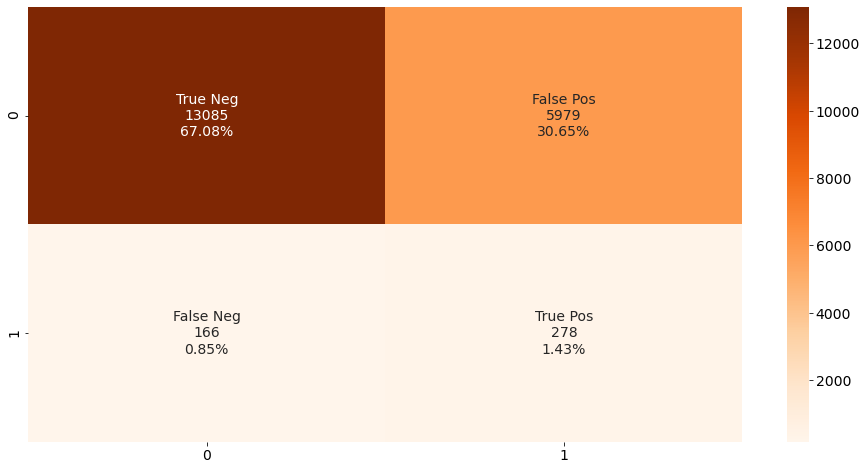

In [147]:
# Auxiliar Graph
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                confusion_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     confusion_matrix.flatten()/np.sum(confusion_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix, annot=labels, fmt='', cmap='Oranges')

In [148]:
# Final report
from sklearn.metrics import classification_report
print(classification_report(y_test_all, y_predict_all))

              precision    recall  f1-score   support

           0       0.99      0.69      0.81     19064
           1       0.04      0.63      0.08       444

    accuracy                           0.69     19508
   macro avg       0.52      0.66      0.45     19508
weighted avg       0.97      0.69      0.79     19508



----------------------------

### Model with all variables with weights

In [149]:
# We set the value for weights accordingly to distribution of our data
w = (df['REPITENTE'].value_counts()/ df.shape[0])[0]

In [156]:
def pesos(x):
    if x == 1:
        peso = w
    else:
        peso = 1-w
    return peso

In [151]:
all_vars = variables + categorias
y = df['REPITENTE']
X = df[all_vars]

X_cons = sm.add_constant(X, prepend=False)
X_cons = pd.get_dummies(X_cons, columns=categorias, drop_first=True)
X_cons.head(2)

,EDAD,estrato,puntaje_sisben_3,indice_hacinamiento,TOTAL_EQUIPO_COMPUTO,ALUMN_POR_DOCENTE,COMPU_POR_ALUMN,TOTAL_DOCENTES_CON_TITULO,PROP_DOCENTES_CON_TITULO,promepuntaje,GRADO_OVERAGE,nparentes,tpersona,const,GENERO_1,POB_VICT_CONF_1,PROVIENE_OTR_MUN_1,TIPO_DISCAPACIDAD_1,CODIGO_ETNIA_1,CODIGO_ETNIA_2,CODIGO_ETNIA_3,CODIGO_ETNIA_4,CODIGO_ETNIA_5,CODIGO_ETNIA_6,CODIGO_JORNADA_2,CODIGO_JORNADA_3,CODIGO_JORNADA_6,DIR_NUM_LOCALIDAD_2,DIR_NUM_LOCALIDAD_3,DIR_NUM_LOCALIDAD_4,DIR_NUM_LOCALIDAD_5,DIR_NUM_LOCALIDAD_6,DIR_NUM_LOCALIDAD_7,DIR_NUM_LOCALIDAD_8,DIR_NUM_LOCALIDAD_9,DIR_NUM_LOCALIDAD_10,DIR_NUM_LOCALIDAD_11,DIR_NUM_LOCALIDAD_12,DIR_NUM_LOCALIDAD_13,DIR_NUM_LOCALIDAD_14,DIR_NUM_LOCALIDAD_15,DIR_NUM_LOCALIDAD_16,DIR_NUM_LOCALIDAD_17,DIR_NUM_LOCALIDAD_18,DIR_NUM_LOCALIDAD_19,DIR_NUM_LOCALIDAD_20,embaraza_1,todos_servicios_Pub_1,teneviv_2,teneviv_3,teneviv_4,computador_1,tiene_auto_1,ES_BILINGUE_1,CAP_EXC_2,CAP_EXC_3,CAP_EXC_4,CAP_EXC_5,CAP_EXC_6,CAP_EXC_7,CAP_EXC_9,CAP_EXC_10,CAP_EXC_11
0,16,3,29.440001,2.500000,231,23.222222,0.368421,24,0.888889,262.909091,0,3,5,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,16,2,60.119999,1.333008,231,23.222222,0.368421,24,0.888889,262.909091,0,4,4,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [154]:
from sklearn.model_selection import train_test_split
X_train_w_all, X_test_w_all, y_train_w_all, y_test_w_all = train_test_split(X_cons, y, test_size=0.3)

In [157]:
pesos = y_train_w_all.apply(pesos)

In [158]:
model_w_all = sm.GLM(y_train_w_all, X_train_w_all, family=sm.families.Binomial(), 
                     freq_weights=pesos).fit()
model_w_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              REPITENTE   No. Observations:                45518
Model:                            GLM   Df Residuals:                  1976.82
Model Family:                Binomial   Df Model:                           62
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1220.6
Date:                Thu, 07 Jul 2022   Deviance:                       2441.2
Time:                        15:35:17   Pearson chi2:                 2.10e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
EDAD                          0.1750      0.084      2.081      0.037       0.010       0.340
estrato                       0.0437      0.092      0.473      0.636      -0.137       0.225
puntaje_sisben_3             -0.0012      0.004     -0.340      0.734      -0.008       0.006
indice_hacinamiento          -0.0115      0.048     -0.240      0.810      -0.105       0.082
TOTAL_EQUIPO_COMPUTO          0.0011      0.000      2.353      0.019       0.000       0.002
ALUMN_POR_DOCENTE            -0.0449      0.016     -2.784      0.005      -0.077      -0.013
COMPU_POR_ALUMN              -0.9518      0.602     -1.580      0.114      -2.133       0.229
TOTAL_DOCENTES_CON_TITULO    -0.0054      0.003     -2.068      0.039      -0.010      -0.000
PROP_DOCENTES_CON_TITULO      1.1740      0.265      4.438      0.000       0.656       1.692
promepuntaje                 -0.0036      0.004     -0.836      0.403      -0.012       0.005
GRADO_OVERAGE                 0.1069      0.015      7.200      0.000       0.078       0.136
nparentes                     0.0147      0.043      0.339      0.735      -0.070       0.100
tpersona                      0.0206      0.032      0.644      0.520      -0.042       0.083
const                       -21.1888   4.07e+04     -0.001      1.000   -7.98e+04    7.97e+04
GENERO_1                      0.5092      0.099      5.152      0.000       0.315       0.703
POB_VICT_CONF_1              -0.3116      0.304     -1.026      0.305      -0.907       0.283
PROVIENE_OTR_MUN_1           -0.1338      0.540     -0.248      0.804      -1.193       0.925
TIPO_DISCAPACIDAD_1          -0.6653      0.372     -1.791      0.073      -1.393       0.063
CODIGO_ETNIA_1                0.0695      0.830      0.084      0.933      -1.557       1.696
CODIGO_ETNIA_2               -0.3743      0.906     -0.413      0.680      -2.151       1.402
CODIGO_ETNIA_3              -21.6068   1.94e+05     -0.000      1.000    -3.8e+05     3.8e+05
CODIGO_ETNIA_4              -20.9670   4.05e+04     -0.001      1.000   -7.93e+04    7.93e+04
CODIGO_ETNIA_5              -22.2303   1.93e+04     -0.001      0.999   -3.78e+04    3.77e+04
CODIGO_ETNIA_6                4.8650      6.719      0.724      0.469      -8.305      18.035
CODIGO_JORNADA_2             20.8167   4.07e+04      0.001      1.000   -7.97e+04    7.98e+04
CODIGO_JORNADA_3             20.6643   4.07e+04      0.001      1.000   -7.97e+04    7.98e+04
CODIGO_JORNADA_6             20.7023   4.07e+04      0.001      1.000   -7.97e+04    7.98e+04
DIR_NUM_LOCALIDAD_2           0.6629      0.822      0.807      0.420      -0.947       2.273
DIR_NUM_LOCALIDAD_3           0.3177      0.626      0.507      0.612      -0.910       1.545
DIR_NUM_LOCALIDAD_4           0.3009      0.353      0.853      0.393      

In [159]:
# Get probabilities of our predictions
y_probs_w_all = model_w_all.predict(X_test_w_all)

# Get fpr = False Positive Rate, tpr = True Positive Rate, we get roc curves
fpr, tpr, thresholds = roc_curve(y_test_w_all, y_probs_w_all)

# Optimize based on Gmeans of TPR*((1-FPR)) lower the FPR the better.
gmeans = np.sqrt(tpr * (1-fpr))
ix = np.argmax(gmeans)

print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
umbral = thresholds[ix]

Best Threshold=0.450654, G-Mean=0.662


In [160]:
def classi(x):
    if x > umbral:
        clase = 1
    else:
        clase = 0
    return clase

In [161]:
# Make predictions based on thresholds
y_predict_w_all = y_probs_w_all.apply(classi)

In [162]:
# Get confussion matrix = Crosstab matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test_w_all, y_predict_w_all)
print(confusion_matrix)

[[12415  6663]
 [  141   289]]


<AxesSubplot:>

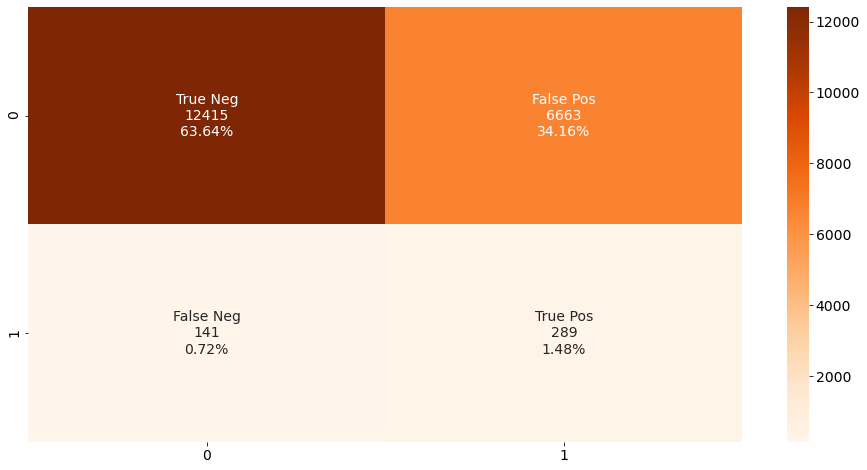

In [163]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                confusion_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     confusion_matrix.flatten()/np.sum(confusion_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix, annot=labels, fmt='', cmap='Oranges')

In [164]:
from sklearn.metrics import classification_report
print(classification_report(y_test_w_all, y_predict_w_all))

              precision    recall  f1-score   support

           0       0.99      0.65      0.78     19078
           1       0.04      0.67      0.08       430

    accuracy                           0.65     19508
   macro avg       0.52      0.66      0.43     19508
weighted avg       0.97      0.65      0.77     19508



## Model with all variables with balanced dataset

## A brief note on why not to use noramalization techniques

[Why not normalize yout data when fitting Logistic Regression?](https://stats.stackexchange.com/questions/48360/is-standardization-needed-before-fitting-logistic-regression)


[Regularization, standarization, normalization worsen model performance](https://www.turing.com/kb/effects-of-normalization-techniques-on-logistic-regression-in-data-science)

----------------------

### Conclusions